##**ASSIGNMENT** 
##**CE 880 An Approachable Introduction to Data Science**
##**Atonye Endeley**
##**Student No 2103195**


# **Predicting the cancellation of hotel booking?**
# **Cancellation Prediction Model**

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans or scheduling conflicts for example. 
This often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

A machine learning-based solution that can assist in forecasting which booking is likely to be cancelled is required due to the rising cost of cancellations. Hotels frequently experience cancellations on reservations made by customers on this premise it is pertinennt to proffer data-driven solutions. In order to help the hotel create policies for dealing with cancellations and refunds, the purpose of this assignment/study is to analyse the data provided to determine which factors have a high influence on booking cancellations. By building a predictive model that can identify which bookings will be cancelled in advance.
Through the creation of a binary classification model to classify hotel booking into (i.e. Not Canceled vs Canceled) and utilising different classification algorithms.

## Data Description

The data contains the different attributes of customers' booking details.
The detailed data dictionary is given below.

**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by the Hotel from the data provided.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [1]:
# Install package for saving and loading PNG images
!pip install pypng

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.3 MB/s eta 0:00:00


In [148]:
#Import Libraries to read and manipulate data
import pandas as pd
import numpy as np

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to read and write png images
import png

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# Apply different metric Scores
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


## Import Dataset

In [5]:
hotel = pd.read_excel("/content/HotelCancelation .xls")

In [6]:
# copying data to avoid changes to original data
data = hotel.copy()

### View the first and last 5 rows of the dataset

In [7]:
data.head() # display the first five rows of the dataframe 


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [8]:
data.tail() #display the last five rows of the dataframe 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


### Shape of the dataset

In [9]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns. 

### Check the data types along the columns of the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

In [11]:
# checking for duplicate values
data.duplicated().sum()

0

- There are no duplicate values in the data.

**Drop the Booking_ID column**

In [12]:
data = data.drop(["Booking_ID"], axis=1)

In [ ]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


## Exploratory Data Analysis

Statistical summary of the data

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


* The number of adults ranges from 0 to 4, which is usual.
* The maximum value in the number of children column is 10, which is a bit unusual and might require further analysis.
* The range of the number of weeks and weekend nights seems fine. Although 7 weekends might be a very long stay.
* It is evident 75% of the customers do not require car parking space.
* On average the customers book 85 days in advance. There is also a huge difference in 75th percentile and maximum value which indicates the possibility of outliers present in this column.
* The information contains two years of data, 2017 and 2018.
* It is evident 75% of the customers are not repeat customers.
* The average price per room is 103 euros. There is a huge difference between the 75th percentile and the maximum value which indicates the possibilty of outliers present in this column.

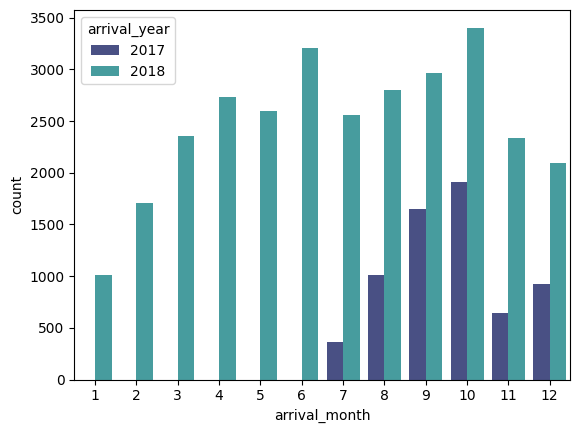

In [14]:
sns.countplot(x ='arrival_month', hue = "arrival_year", data = data, palette ="mako")
plt.show() # arrival year and months

### Univariate Analysis

In [16]:
# function to plot a boxplot and histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Analysis and observations on lead time

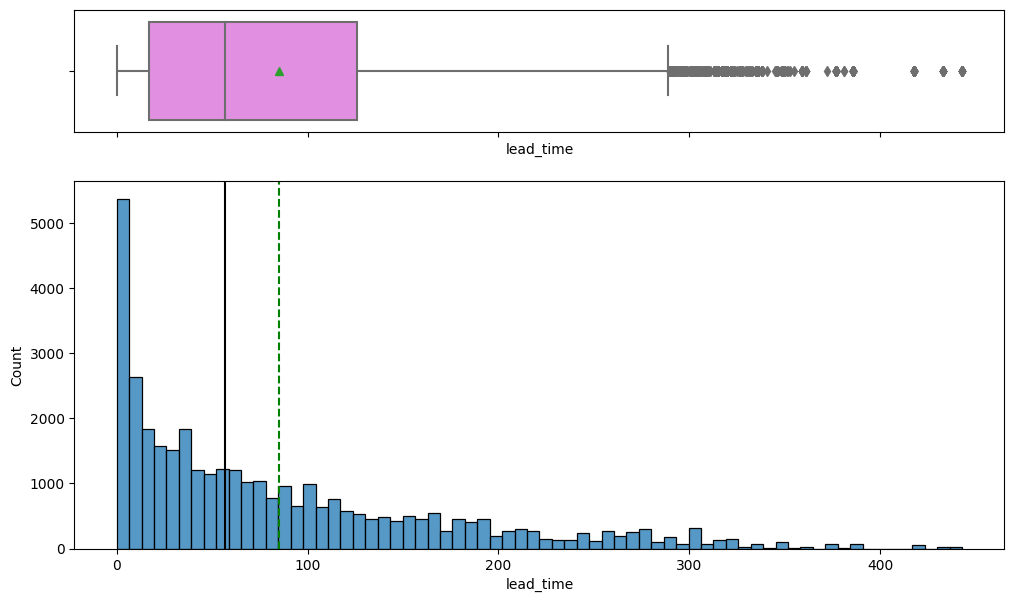

In [17]:
histogram_boxplot(data, "lead_time")
plt.savefig('lead_time.png')


- The distribution of lead time is skewed to the right, with the presence of  many outliers.
- Some customers made their booking around 500 days in advance.
- A large number of customers made their booking on the day of arrival.

### Analysis and observations on average price per room

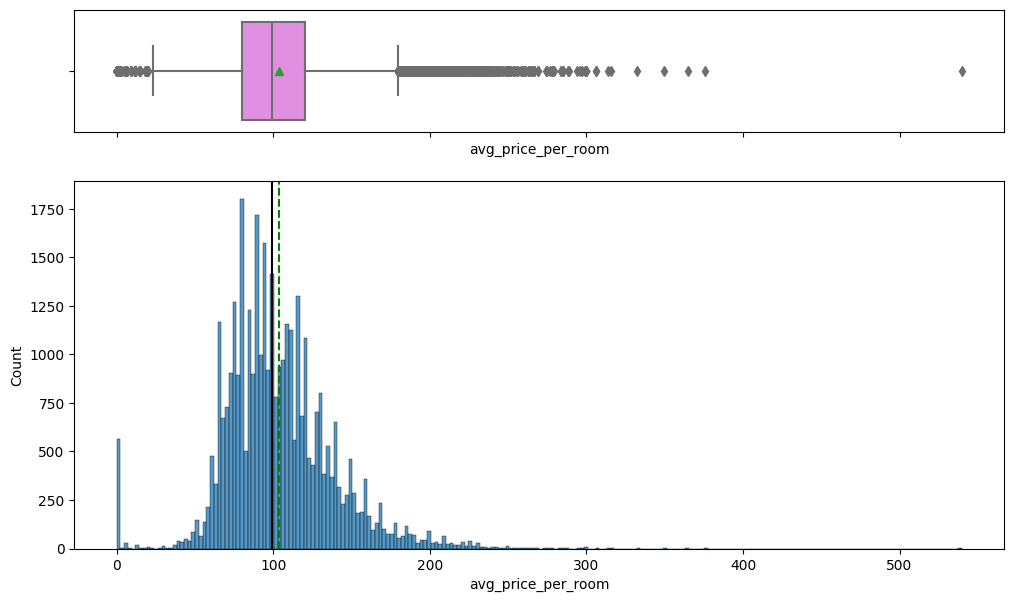

In [18]:
histogram_boxplot(data, "avg_price_per_room")
plt.savefig('avg_price_per_room.png')



* The distribution of average price per room is skewed to the right. There are 
outliers on both sides.
* The average price of a room is around 100 euros.
* There is only one observation where the average cost of a room exceeds 500 euros. This differs greatly from the other values. Instead of dropping it, it will be clipped to the upper whisker (Q3 + 1.5 * IQR).
* It is also observed some rooms have a price equal to 0. This will require further investigation.

In [19]:
data[data["avg_price_per_room"] == 0]


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [20]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It is justfiable that most values with room prices equal to 0 are the rooms given as complimentary service by the hotel.

* It is also possible that the rooms booked online are part of some promotional campaign by the hotel.

In [21]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [22]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

### Analysis and observations on number of previous booking cancellations

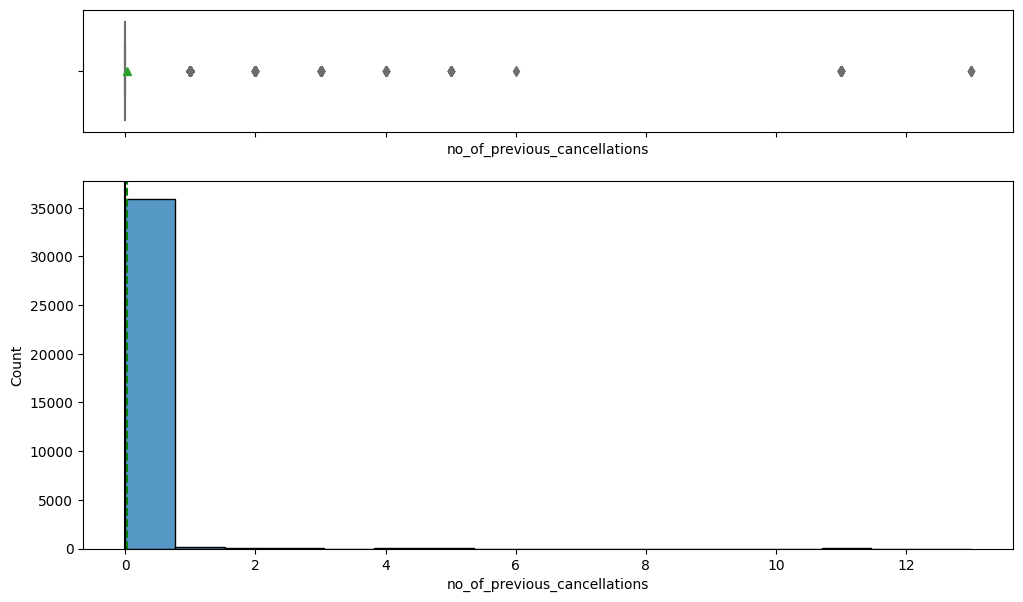

In [23]:
histogram_boxplot(data, "no_of_previous_cancellations")
plt.savefig('no_of_previous_cancellations.png')


* Very few customers have more than one cancellation.
* Some customers cancelled more than 12 times.

### Analysis and observations on number of previous booking not cancelled

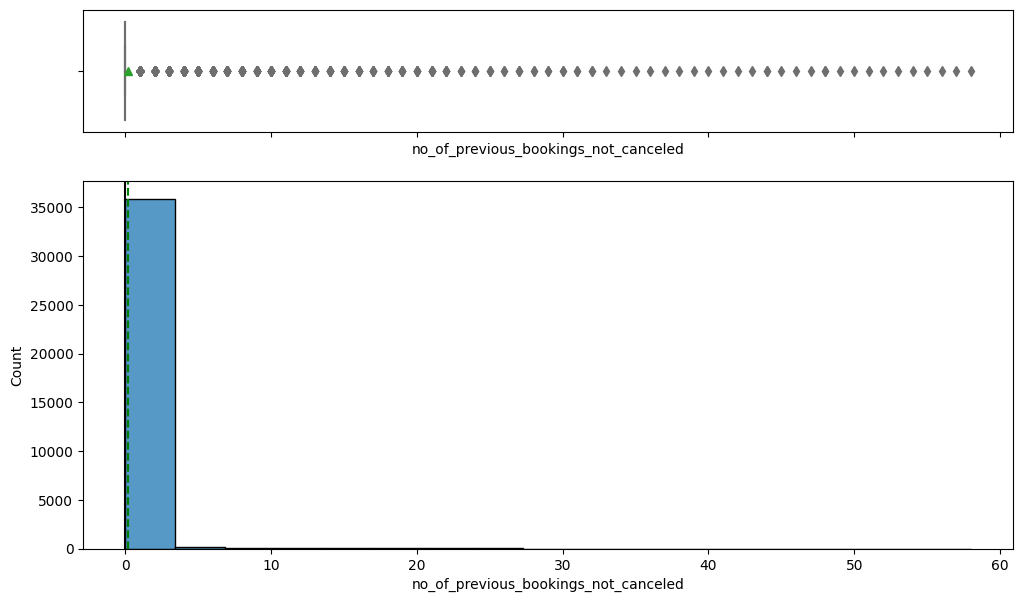

In [24]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")
plt.savefig('no_of_previous_bookings_not_canceled.png')


* Very few customers have more than 1 booking not canceled previously.
* Some customers have not canceled their bookings around 60 times.

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Analysis and observations on number of adults

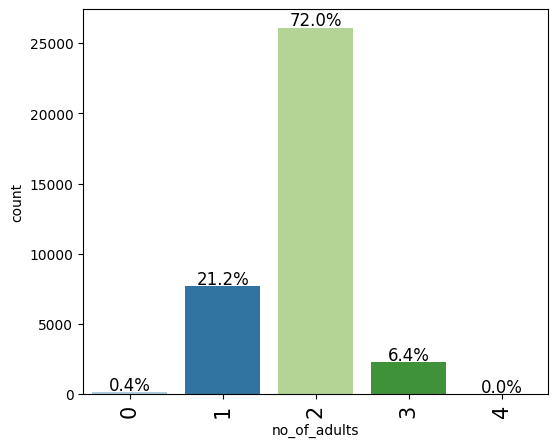

<Figure size 640x480 with 0 Axes>

In [26]:
labeled_barplot(data, "no_of_adults", perc=True)
plt.savefig('no_of_adults.png')



* 72% of the bookings were made for 2 adults.

### Analysis and observations on number of children

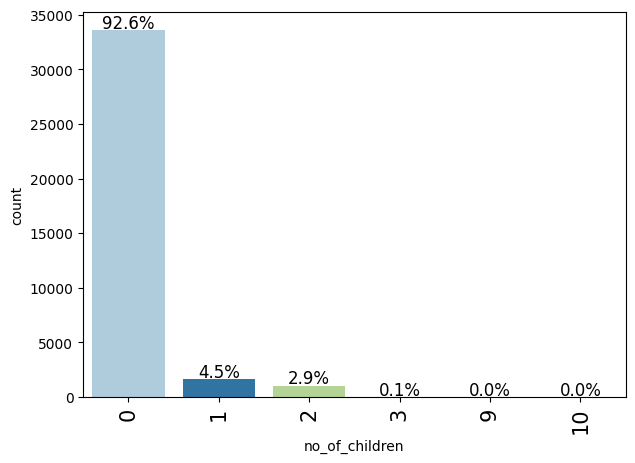

<Figure size 640x480 with 0 Axes>

In [28]:
labeled_barplot(data, "no_of_children", perc=True)
plt.savefig('no_of_children.png')


* 93% of the customers did not make reservations for children.

* There are some values in the data where the number of children shows 9 or 10, which is highly unlikely. 
* These values will be replaced with the maximum value of 3 children.

In [29]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

### Analysis and observations on number of week nights

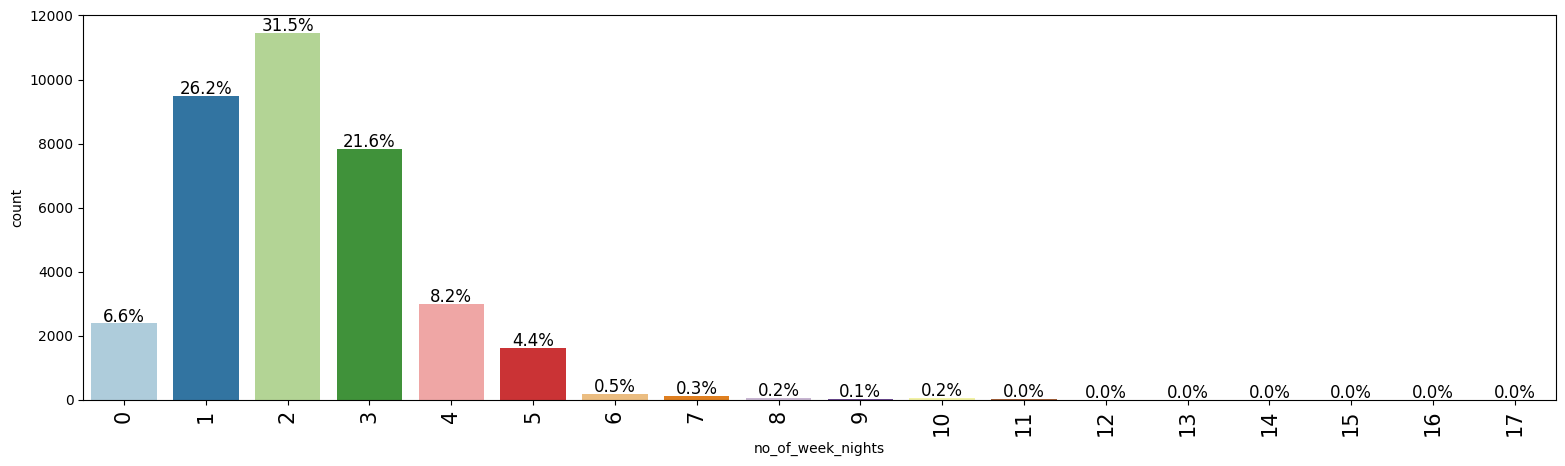

<Figure size 640x480 with 0 Axes>

In [31]:
labeled_barplot(data, "no_of_week_nights", perc=True)
plt.savefig('no_of_week_nights.png')


* Most bookings are made for 2 nights (31.5%) followed by 1 night (26.2%).
* A low proportion of customers made their booking for more than 10 days.

### Analysis on number of weekend nights

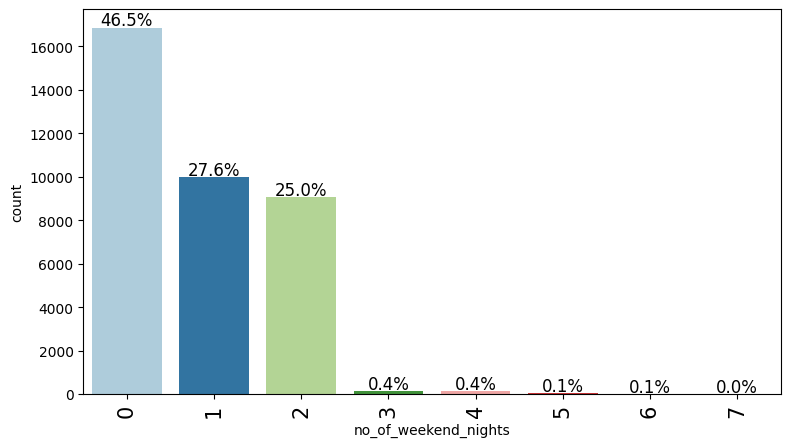

<Figure size 640x480 with 0 Axes>

In [33]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)
plt.savefig('no_of_weekend_nights.png')


* 46.5% of the customers do not plan to spend the weekend in the hotel.
* The percentage of customers planning to spend 1 or 2 weekends in the hotel is almost the same.

### Analysis and observations on required car parking space

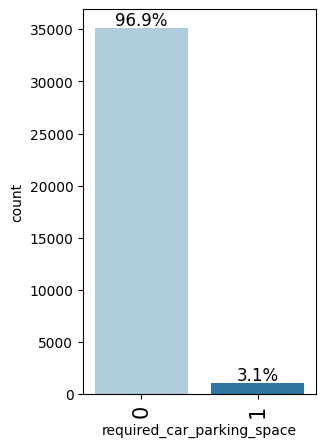

<Figure size 640x480 with 0 Axes>

In [34]:
labeled_barplot(data, "required_car_parking_space", perc=True)
plt.savefig('required_car_parking_space.png')


* 96.9% of the customers do not require a space in the car park.

### Analysis on type of meal plan

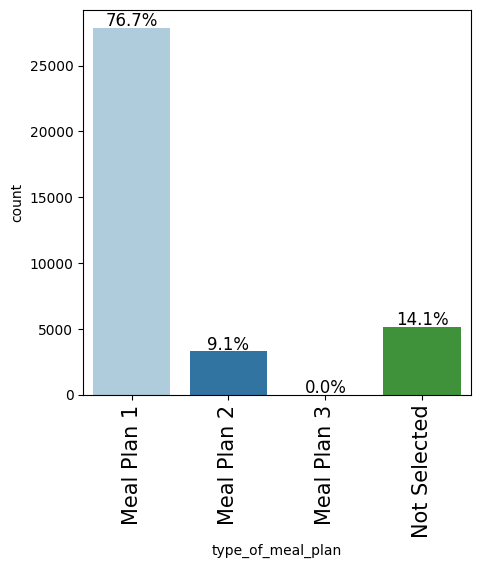

<Figure size 640x480 with 0 Axes>

In [35]:
labeled_barplot(data, "type_of_meal_plan", perc=True)
plt.savefig('type_of_meal_plan.png')


* Most of the customers prefer meal plan 1 that is only breakfast.
* 14.1% of the customers did not select a meal plan.

### Analysis and observations on room type reserved

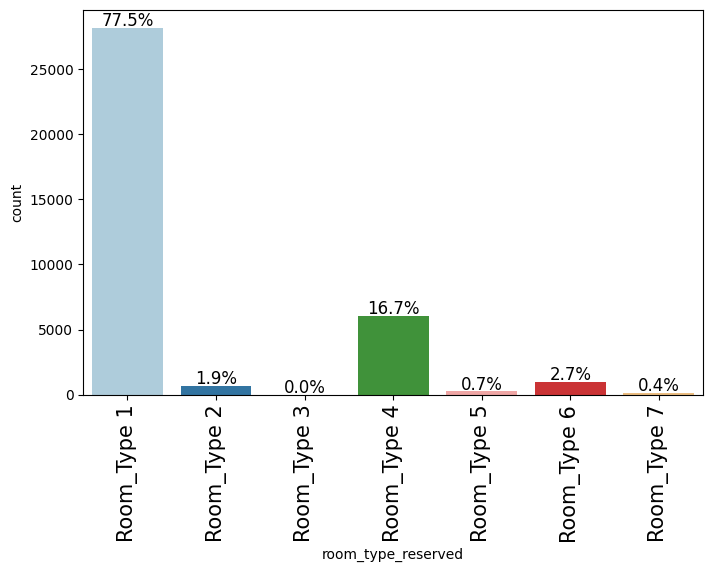

<Figure size 640x480 with 0 Axes>

In [36]:
labeled_barplot(data, "room_type_reserved", perc=True)
plt.savefig('room_type_reserved.png')


* Around 77% of the customers booked Room_Type 1 followed by 17% of the customers booked Room_Type 4.

### Analysis and observations on arrival month

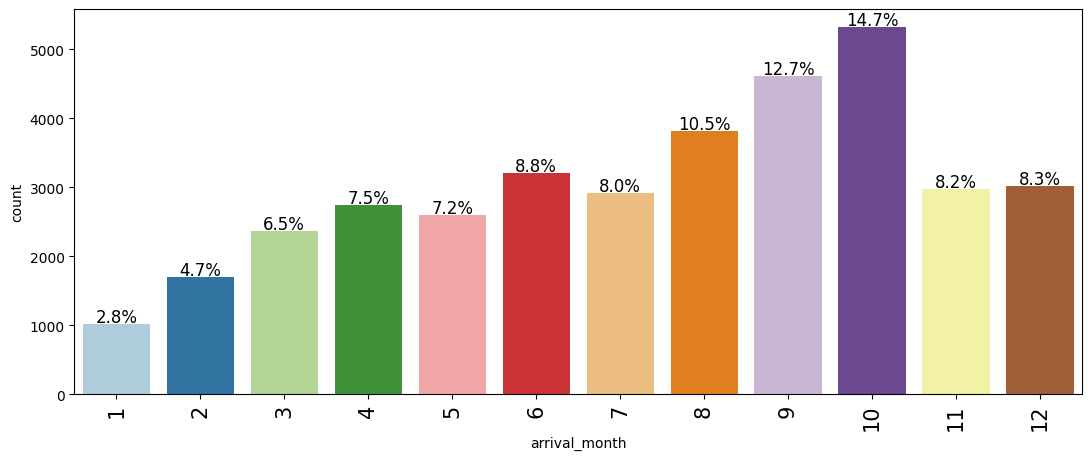

<Figure size 640x480 with 0 Axes>

In [37]:
labeled_barplot(data, "arrival_month", perc=True)
plt.savefig('arrival_month.png')


* October is the busiest month for the hotel followed by September.
* 14.7% of bookings were made in October.


### Analysis and observations on market segment type

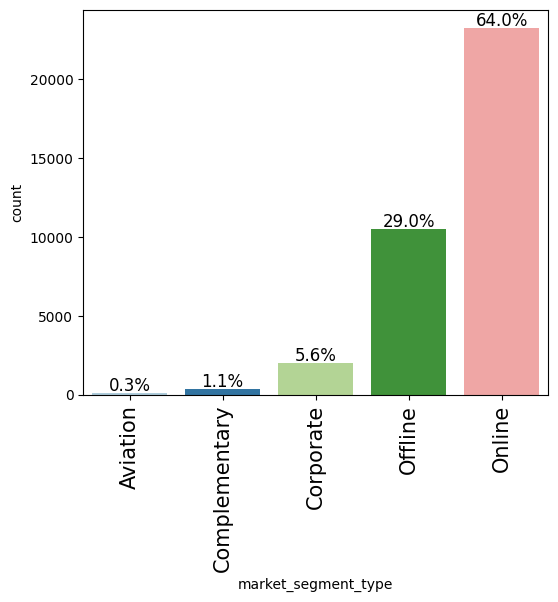

<Figure size 640x480 with 0 Axes>

In [38]:
labeled_barplot(data, "market_segment_type", perc=True)
plt.savefig('market_segment_type.png')


* 64% of the hotel bookings were made online, while 29% of the bookings were made offline.

### Analysis and observations on number of special requests

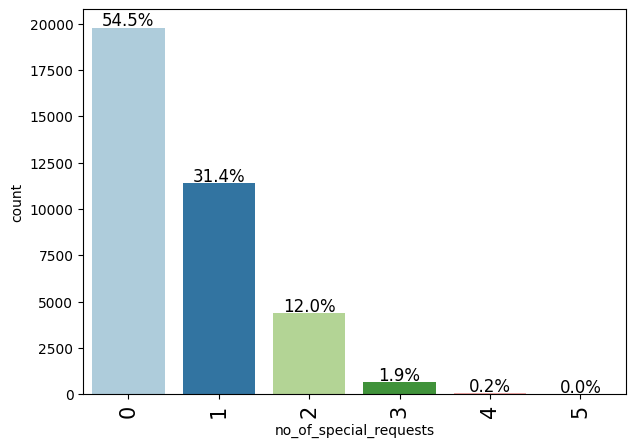

<Figure size 640x480 with 0 Axes>

In [39]:
labeled_barplot(data, "no_of_special_requests", perc=True)
plt.savefig('no_of_special_requests.png')


* During the booking process for a hotel room, 54.5% of customers typically do not make any request.

### Analysis and observations booking status

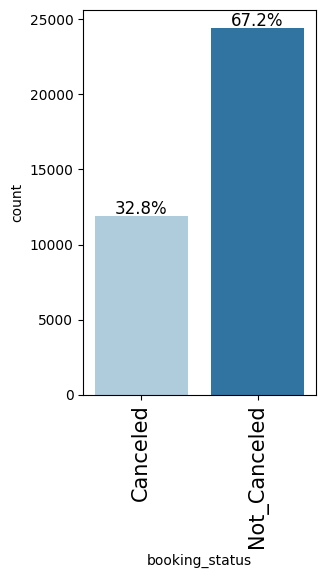

<Figure size 640x480 with 0 Axes>

In [40]:
labeled_barplot(data, "booking_status", perc=True)
plt.savefig('booking_status.png')


* 32.8% of bookings were canceled by the customers.

** For further analysis Canceled bookings will be encoded to 1 and Not_Canceled as 0**

In [41]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

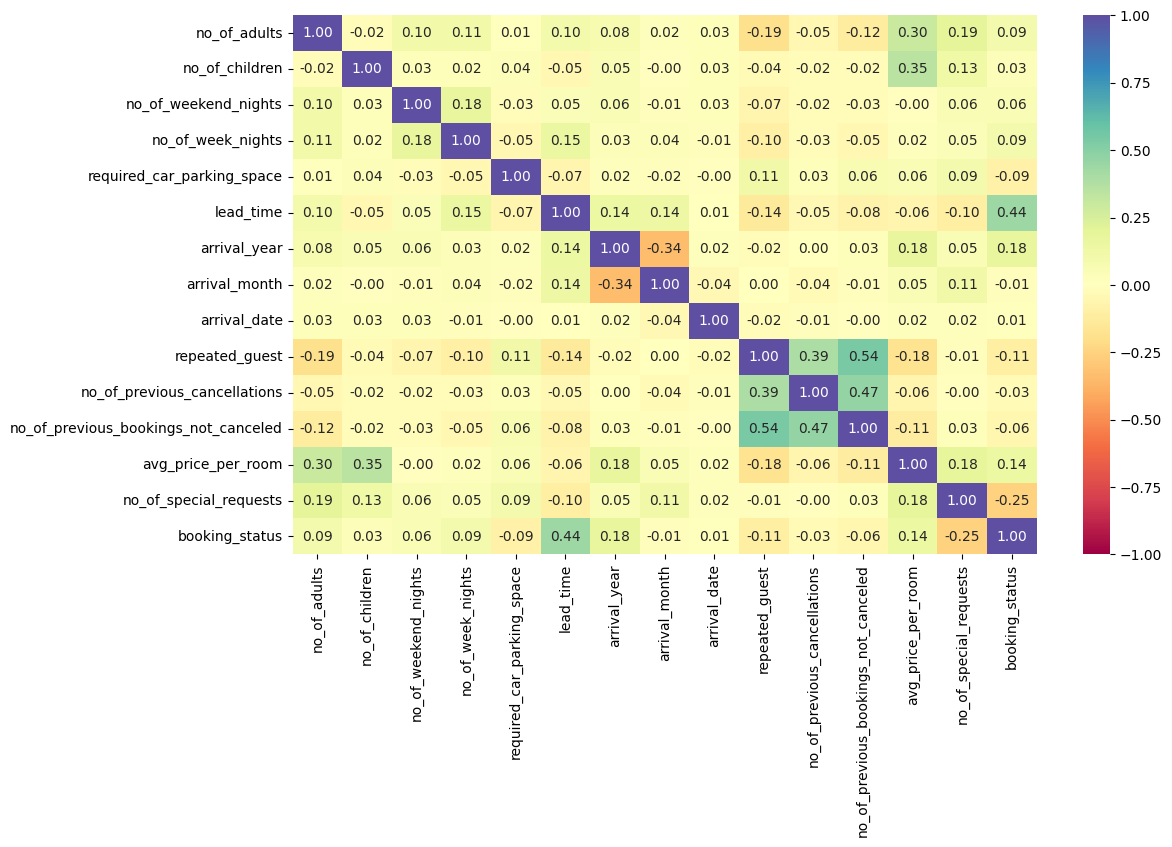

In [42]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The number of guests both adults and kids, with the average cost per room are 
positively correlated.
 * This clearly indicates the hotel will require more rooms to accomdate any increase in the number of customers which will in effect raise the price of a room. Signifying the law of supply and demand.
*  Average room cost and returning customers have a negative relationship. On this basis it can be assumed the hotel offers its patrons rewards for their loyalty
* There is a positive correlation between the number of previous bookings cancelled and previous bookings not cancelled by a customer and repeat guest.
* There is a positive correlation between lead time and the number of weeknights a customer plans  to stay in the hotel.
* The booking status and lead time have a positive correlation, on this premise cancellation increases with increase in lead time. This requires further analysis.
* There is a negative correlation between the number of special requests made by the customer and the status of the reservation, indicating the likelihood of cancellation may be reduced if the customer has a special request. This requires a detailed examination. 

**Create functions for further analysis.**

In [43]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [44]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Hotel rates are dynamic because they are characterised by constant change especially with the demand and demographics of customers.
* Next step checking the variation in prices across different market segments.

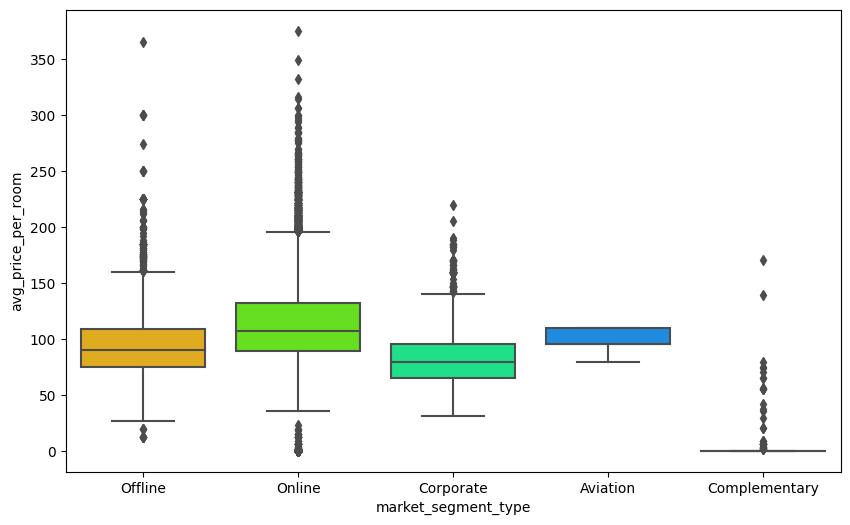

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

#Analysis and observations
* Rooms booked online have high variation in prices.
* Offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, this is understandable.

**Check on the following**

* 1.How booking status varies across different market segments. 
* 2.How average price per room impacts booking status

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


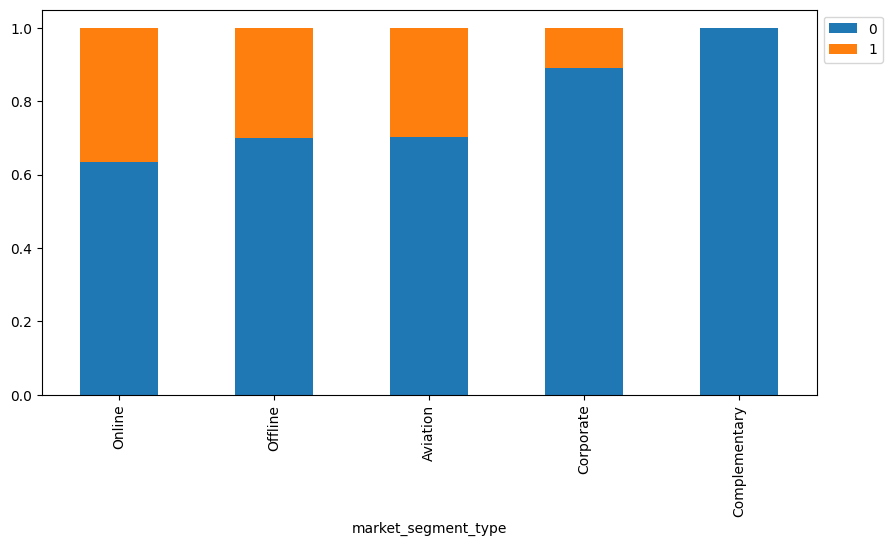

In [46]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Around 40% of booking made online were cancelled.
* Bookings made offline are less prone to cancellations.
* Corporate segment shows very low cancellations.

**Many guests have special requirements when booking a hotel room**.: 
* Check the impact on cancellations

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


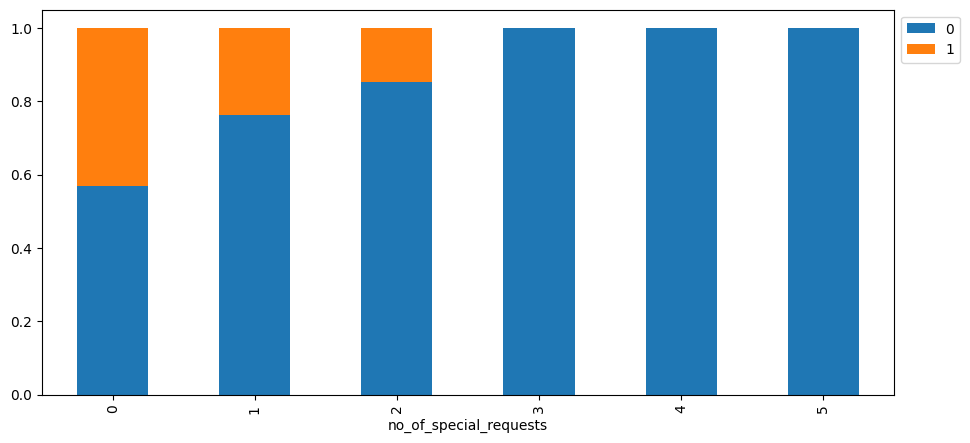

In [47]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

* If a customer has made more than 2 requests there is a high probability the booking will not be cancelled.

**Check if special requests from customers impacts the price of a room**

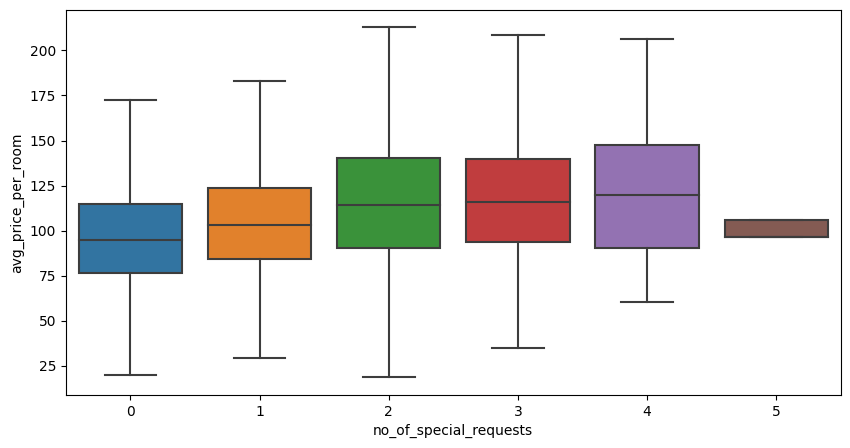

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="no_of_special_requests",
    y="avg_price_per_room",
    showfliers=False,  # turning off the outliers
)
plt.show()

* The median prices of rooms where customers made special requests are slightly higher than the rooms without any requests.

* From earlier analysis it is observed there is a positive correlation between booking status and average price per room.

* This can be analysed further.

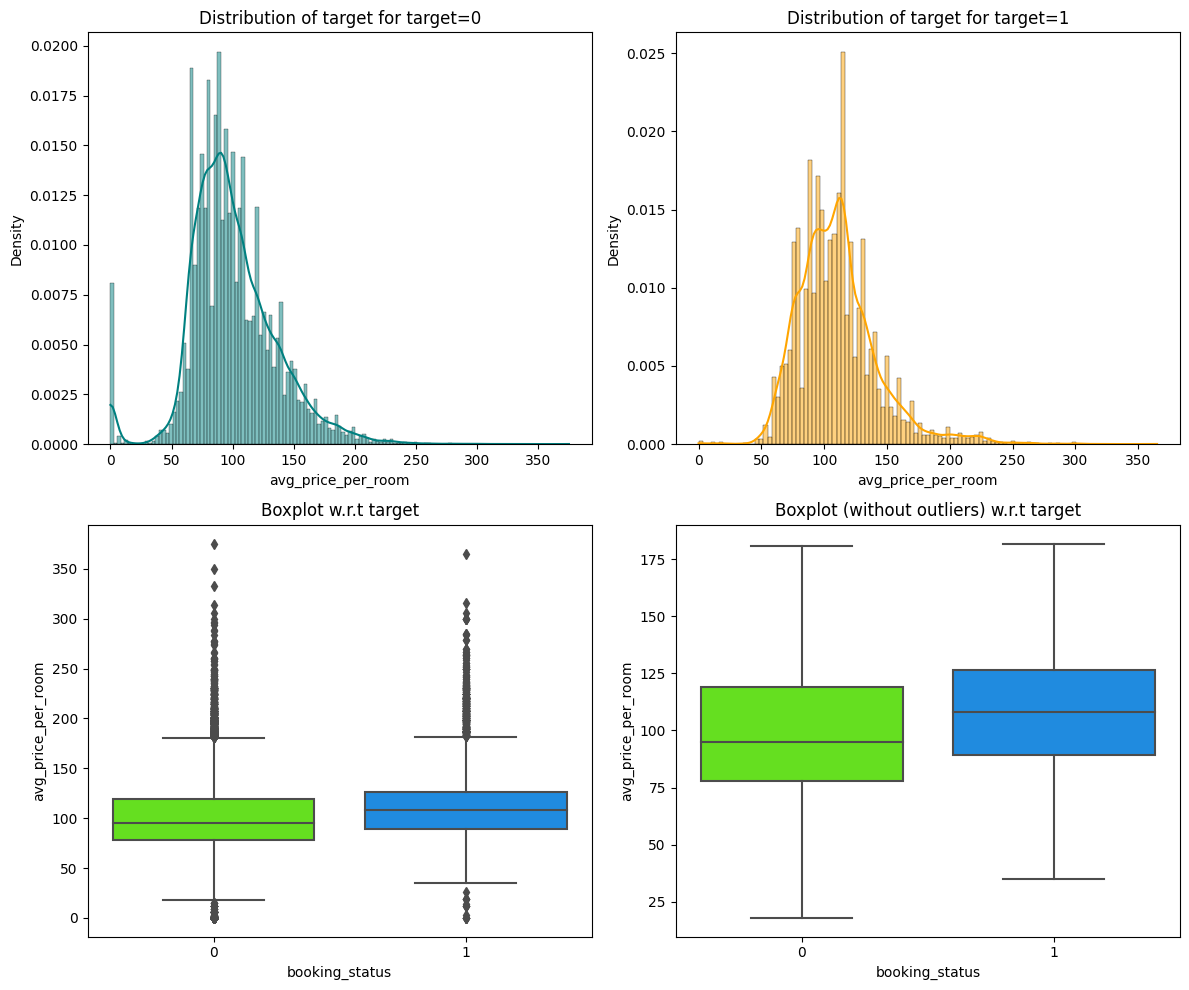

In [49]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* The distribution of prices for cancelled bookings and those that where not cancelled are similar.
* The prices for the cancelled bookings are slightly higher than the bookings which were not cancelled.

**Result shows there is a positive correlation between booking status and lead time** 
* This can be analysed further

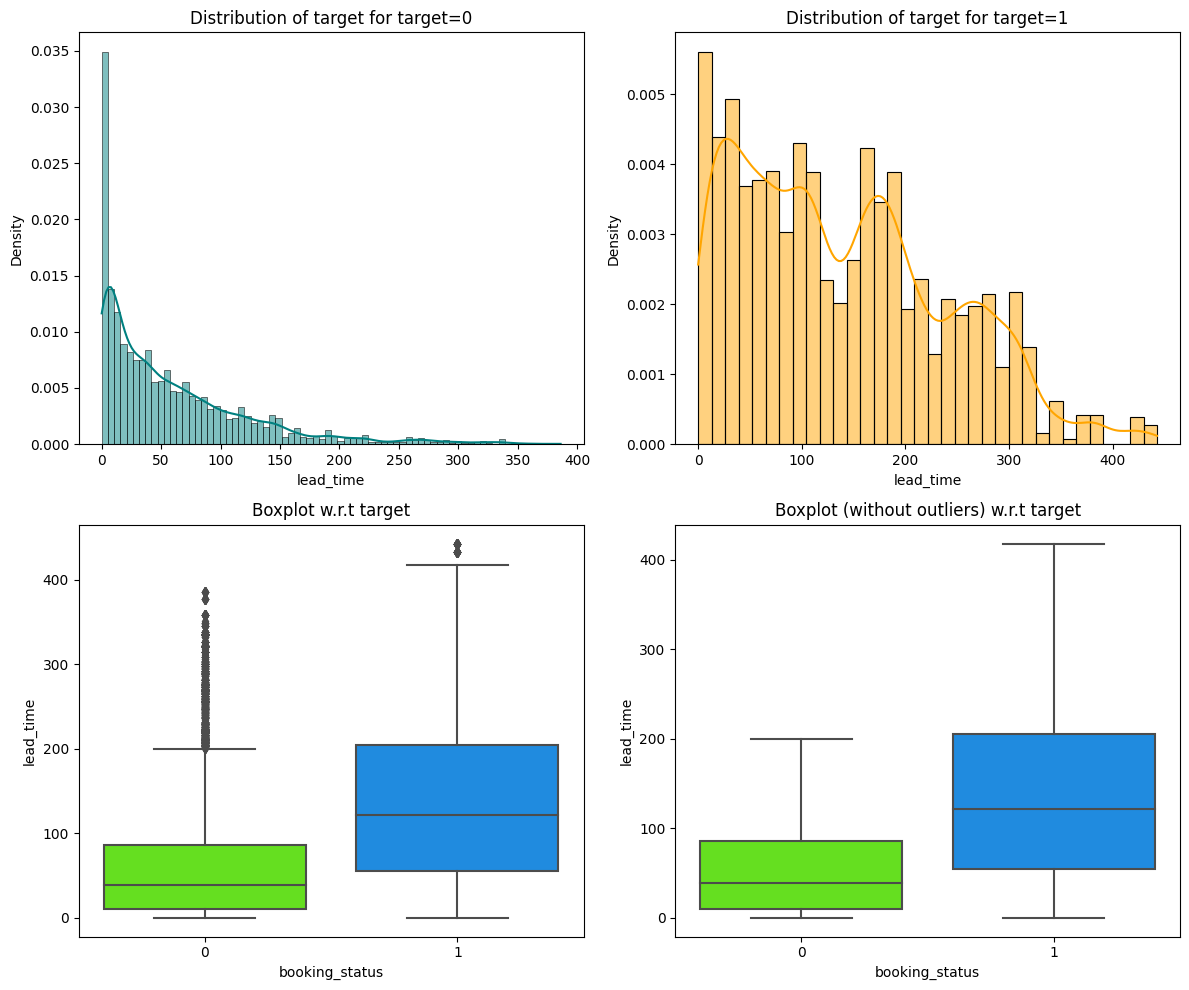

In [50]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

* There's a big difference in the median value of lead time for bookings that were cancelled and bookings that were not cancelled.
* The higher the lead time, the higher the chances of a booking being cancelled.

**Generally people travel with their spouse and children for vacation. 
activities.
* To analyse the impact on booking status, a new dataframe can be created to establish the customer segment that traveled with their families**

In [51]:
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [52]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

<ipython-input-52-22ec7effe0f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_data["no_of_family_members"] = (


booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


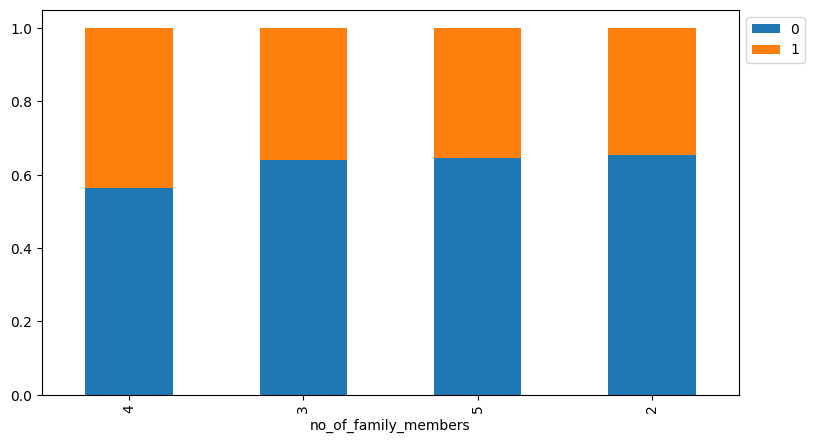

In [53]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

* There is a 40% chance of a booking being cancelled if the booking is made for a family of 4.

**Analysis  and observation of customers who stay for at least one day at the hotel.**

In [54]:
stays_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stays_data.shape

(17094, 18)

In [55]:
stays_data["total_days"] = (
    stays_data["no_of_week_nights"] + stays_data["no_of_weekend_nights"]
)

<ipython-input-55-ed1d2c994bc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stays_data["total_days"] = (


booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

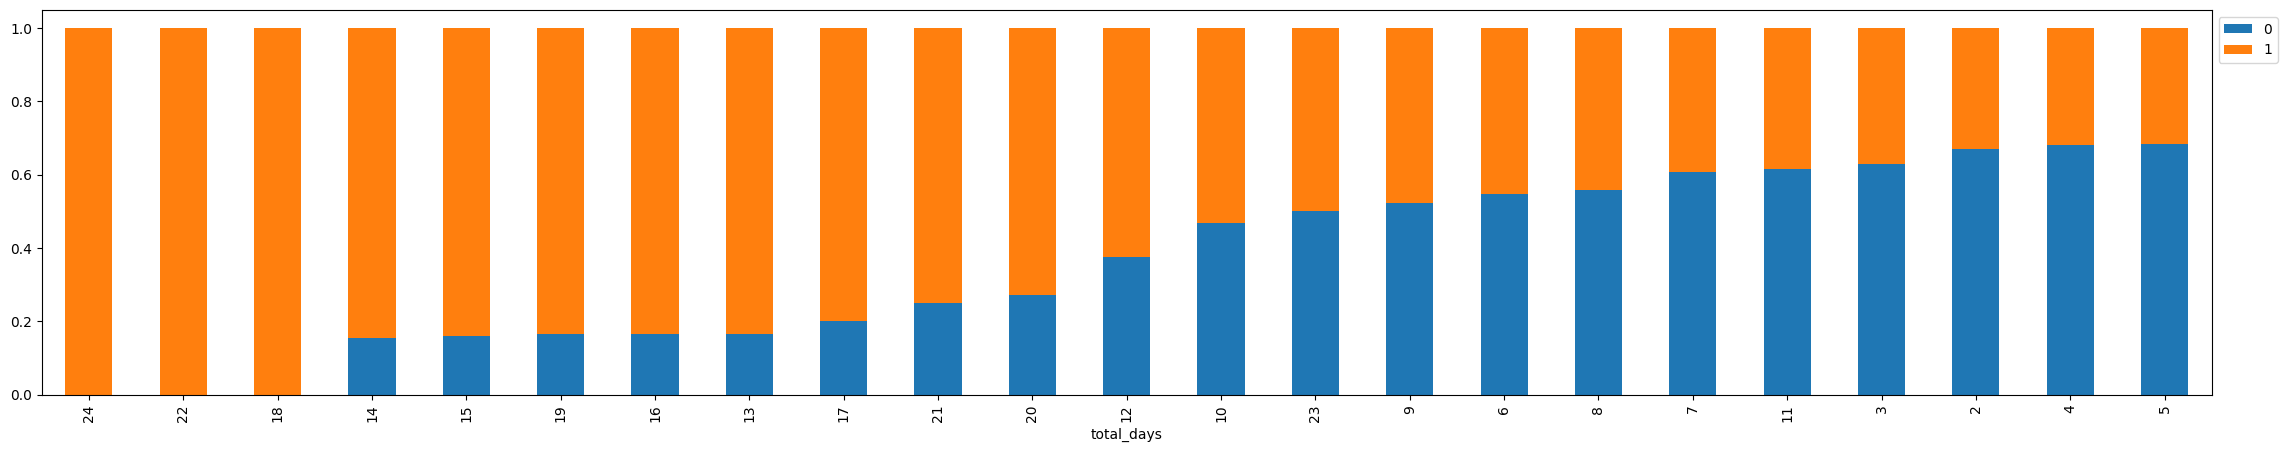

In [56]:
stacked_barplot(stays_data, "total_days", "booking_status")

* The graph shows the likelihod of a booking being cancelled increases with the number of days the customer planned to stay at the hotel.

**Repeat guests are the guests who stay in the hotel often and are important 
to the hotel sector. 
* Next is to analyse what percentage of repeat guests cancel**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


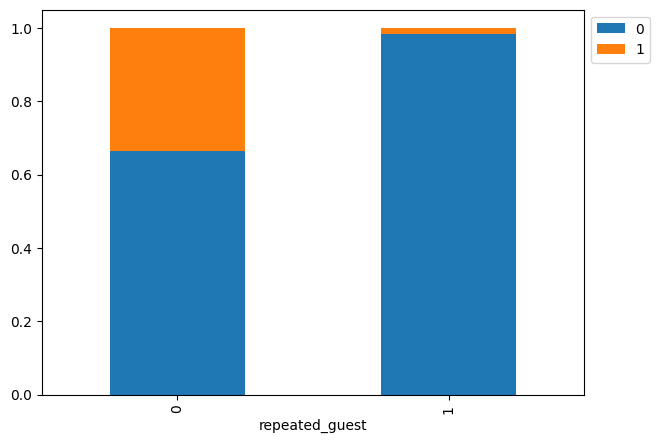

In [57]:
stacked_barplot(data, "repeated_guest", "booking_status")

 **Results show the following** 
* There are very few repeat customers but cancellation among them is low.
* This is a good indication as repeat customers are important for the hospitality industry, they can help spread information about their experience through word of mouth.
* A loyal guest is usually more profitable for the business because they are familiar with what is on offer at a hotel they have previously visited.
* Attracting new customers is laborious and costs more when compared to repeat *guest*.

# Analysis and observations of busy months in the hotel



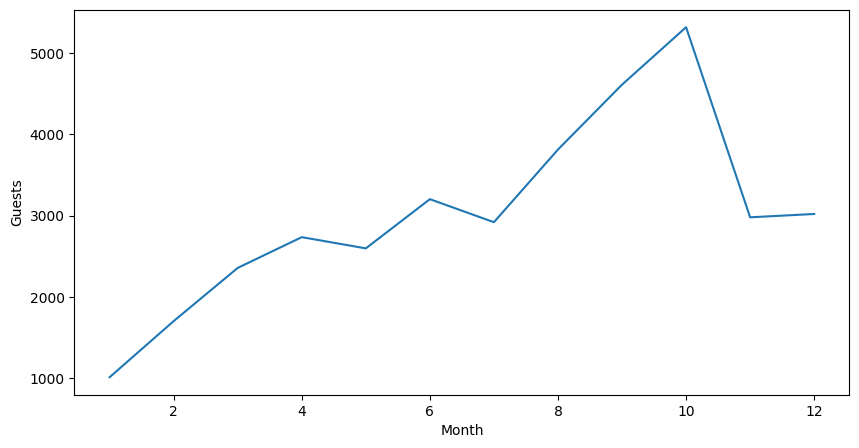

In [58]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

* Results show the number of bookings remains consistent from April to July, the hotel sees around 3000 to 3500 guests.
* Most bookings were made in October, more than 5000 bookings. 
* The least number of bookings were made in January, around 1000 bookings.

**Evaluation of the percentage of cancelled bookings in each month.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


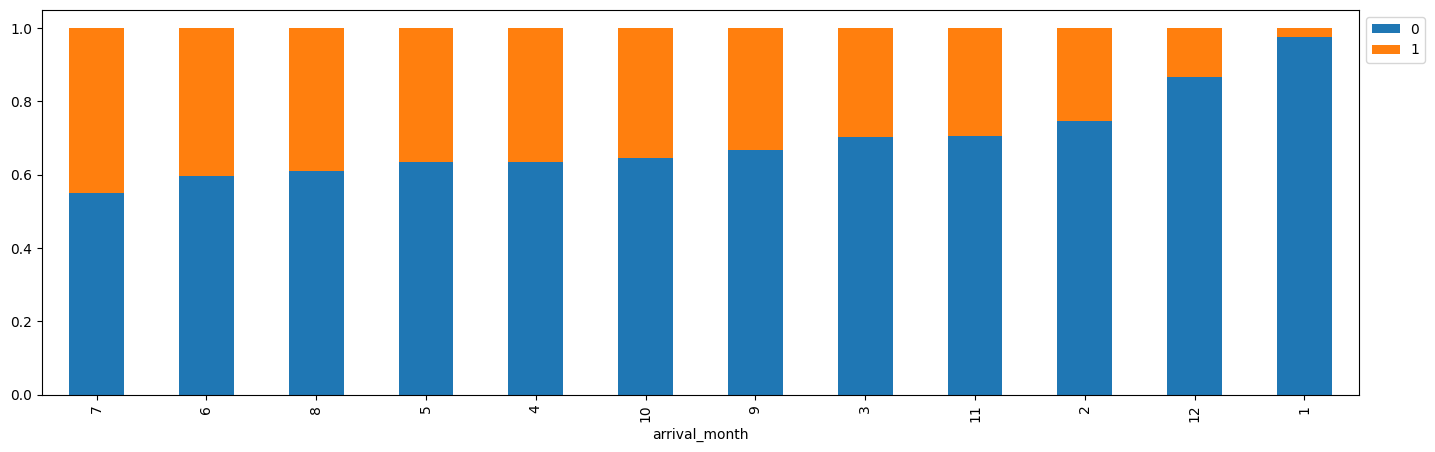

In [59]:
stacked_barplot(data, "arrival_month", "booking_status")

* From the result although the highest number of bookings were made in September and October, around 40% of the bookings got cancelled.
* Cancelled bookings  are low in December and January, the probability is that  customers might have traveled to celebrate the holidays during Christmas and New Year.

**Hotel room prices are dynamic, an analysis of how the prices vary across different months will be conducted**

<ipython-input-61-5c5ee301e801>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)


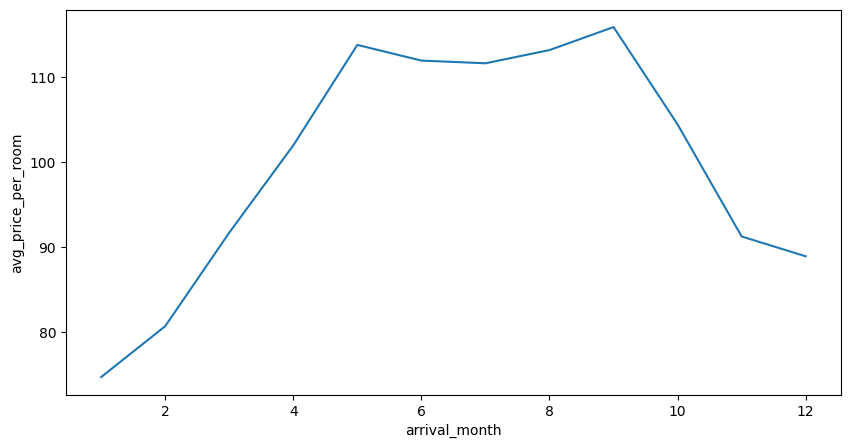

In [61]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

*The prices of rooms is very high in May to September costing around 115 euros per room.

## Checking for outliers

Analyse outliers in the data.

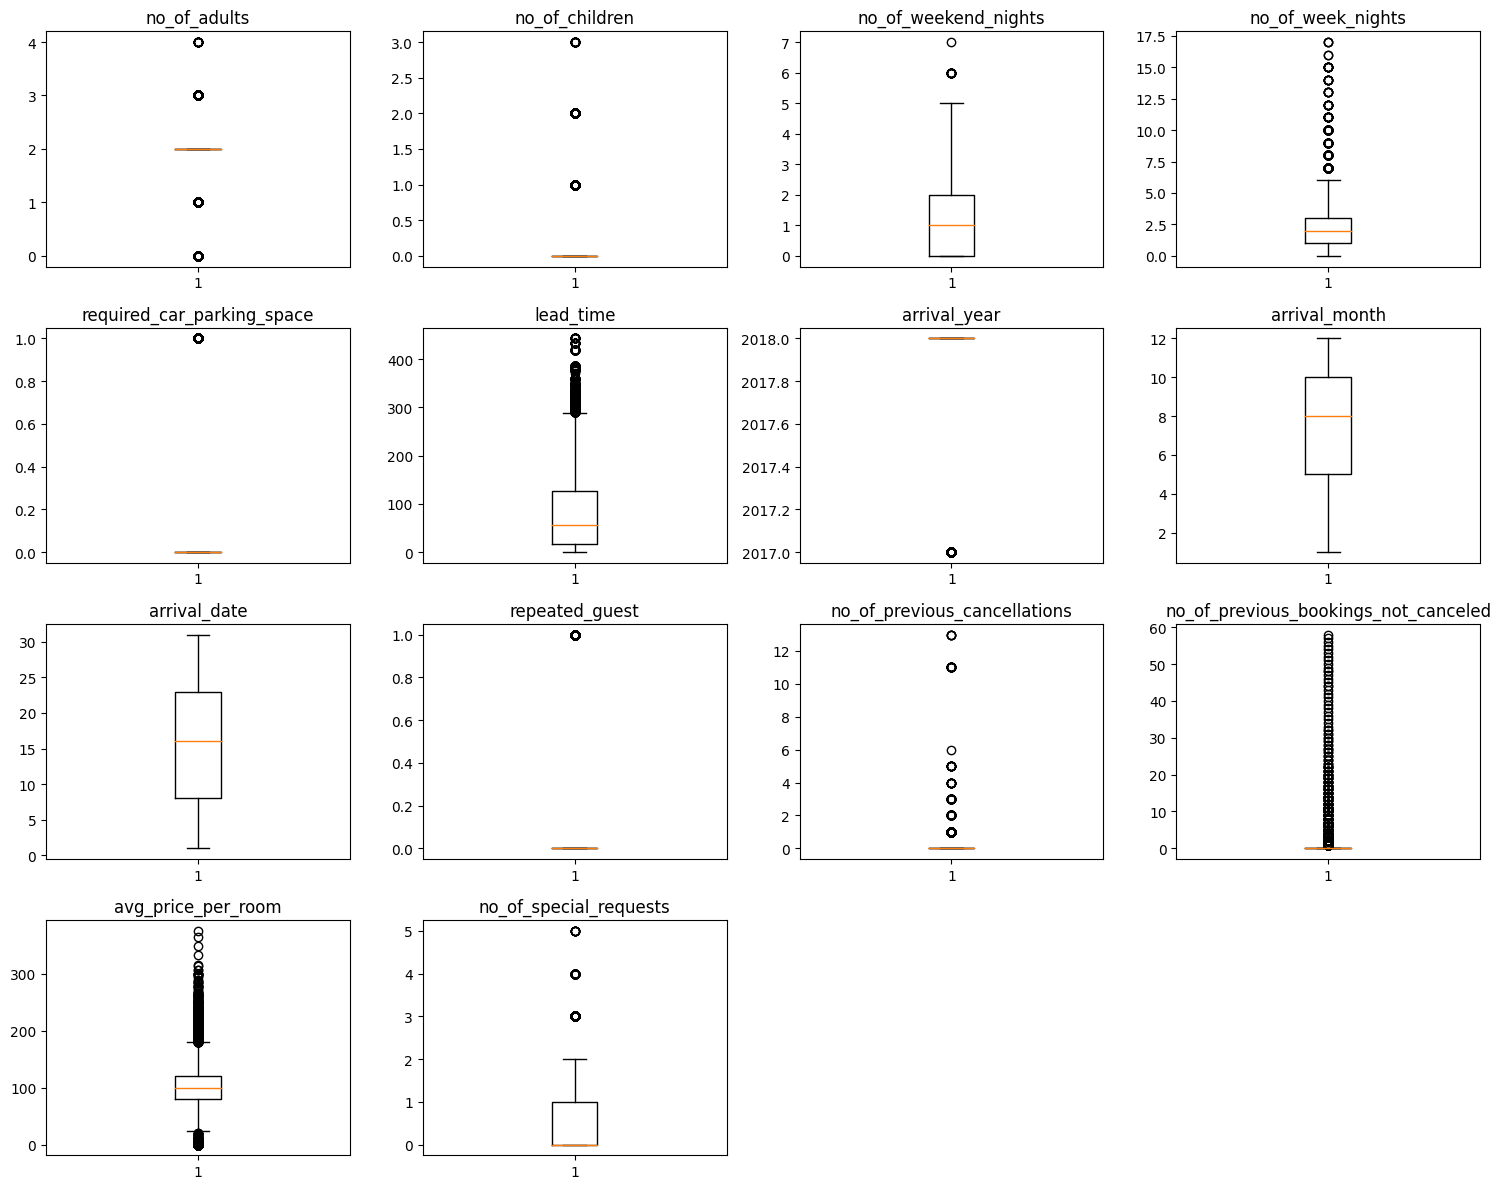

In [62]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**
Findings from the data set
- There are a few outliers in the data.
- However, they will not be treated as they are proper values.

### Data Preparation for modeling
Steps to be conducted
- Predict which bookings will be cancelled.
- First build a model, by encoding categorical features.
- Next split the data into train and test sets, then evaluate the model built on the train data.

In [63]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [64]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


###**Criteria for Model Evaluation**

### Wrong predictions can be made with the Model on the following basis:

1. Predicting a customer will not cancel their booking, when in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking, when in reality, the customer will not cancel their booking. 

### An analysis of which of the cases are more important? 

* Both cases are important on the following basis:

* If it is predicted that a booking will not be cancelled and the booking gets cancelled then the hotel will lose resources and will bear the additional costs from the distribution channels.

* If is predicted that a booking will get cancelled and the booking does not the hotel might not be able to provide services that are satisfactory to the customer on the basis that the booking will be cancelled. This might have an adverse effect on the value of the brand. 

### How hotels can reduce losses?
* Hotels would want `F1 Score` to be maximised, i.e. the greater the F1 score the higher the chances of minimising False Negatives and False Positives. 


#### Functions to calculate different metrics and confusion matrix.
* The model_performance_classification_statsmodels function will be used to check the performance of the models. 
* Confusion_matrix_statsmodels will be used to plot the confusion matrix.

In [124]:
# define a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [125]:
# define a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with statsmodels library)

In [126]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [127]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                  0.3292
Time:                        02:54:45   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [135]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


**INSIGHTS**

**Findings from the data set**

- Negative values of the coefficient show the probability of customers cancelling the booking decreases with increase in the value of the corresponding attribute.

- Positive values of the coefficient show the probability of customers cancelling increases, with increase in the value of the corresponding attribute.

- p-value of a variable indicates if the variable is significant or not. Considering the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-value.

* To resolve this the presence of multicollinearity can be removed from the data to get a reliable coefficient and p-value.

* Different ways can be implemented to detect (or test) the presence of multi-collinearity, an example is the Variation Inflation Factor (VIF).

### Multicollinearity

In [136]:
# define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [137]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


**INSIGHTS**

- None of the numerical variables show moderate or high multicollinearity.
- As a result VIF for the dummy variables, will be ignored.

### Dropping high p-value variables
The steps are as follows

- Drop the predictor variables having a p-value greater than 0.05 as they do not have a significant impact on the target variable.
- Due to the fact that p-values might change after dropping a variable. All variables will not be dropped at once.

- The following steps will be adopted:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the two steps above until there are no columns with p-value > 0.05.

The above process can also be carried out manually by picking one variable at a time that has a high p-value, dropping it, and building the model again. That might be a bit labourious therefore using a loop will be more efficient.

In [138]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [139]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [140]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                  0.3282
Time:                        03:02:28   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

In [141]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


* All the variables left have p-value<0.05.
* It can be concluded that lg1 is the best model for making any inference.
* The performance on the training data is the same as before dropping the variables with the high p-value.

### Interpretations of coefficients

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer cancelling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer cancelling their booking.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds, check the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [142]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


### Interpretation of the Coefficients

* `no_of_adults`: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting cancelled by 1.11 times or a 11.49% increase in the odds of a booking getting cancelled.
* `no_of_children`: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting cancelled by 1.16 times or a 16.54% increase in the odds of a booking getting cancelled.
* `no_of_weekend_nights`: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.11 times or a 11.46% increase in the odds of a booking getting cancelled.
* `no_of_week_nights`: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.04 times or a 4.25% increase in the odds of a booking getting cancelled.
* `required_car_parking_space`: The odds of a customer who requires a car parking space are 0.2 times less than a customer who doesn't require a car parking space or a 79.70% fewer odds of a customer canceling their booking.
* `lead_time`: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.58% increase in the odds of a booking getting cancelled.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in the number of special requests made by the customer will decrease the odds of a booking getting cancelled by 0.22 times or a 77% decrease in the odds of a booking getting cancelled.
* `avg_price_per_room`: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.93% increase in the odds of a booking getting cancelled.
* `type_of_meal_plan_Not Selected`: The odds of a customer who has not selected any meal plan cancelling the booking are 1.33 times more than a customer who has selected a meal plan or a 33.10% higher odds of a booking getting cancelled if a meal plan is not selected. 

Performance of the model on the training set

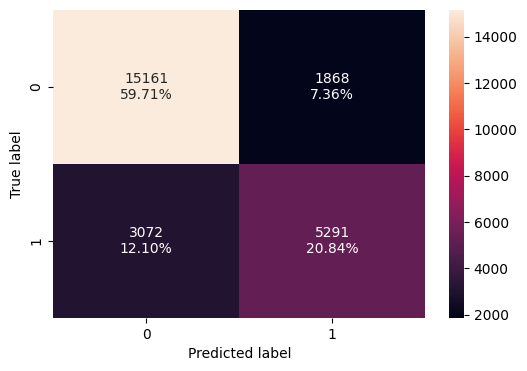

In [145]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [146]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


#### ROC-AUC
* ROC-AUC on training set

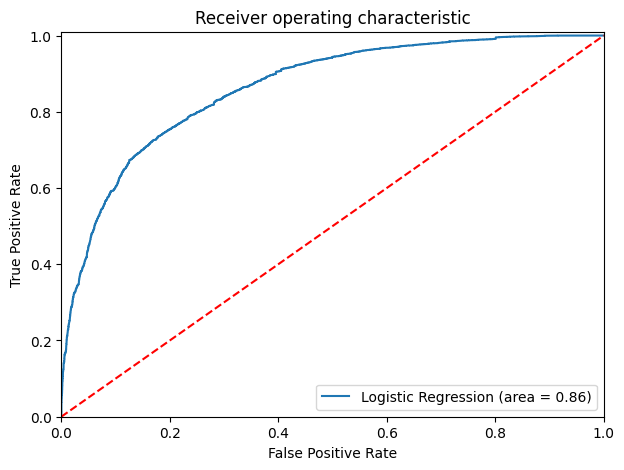

In [149]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalised performance on both the train and test set.
* ROC-AUC score of 0.86 on the training set is quite good.

### Model Performance Improvement

* Analyse if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [150]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708252


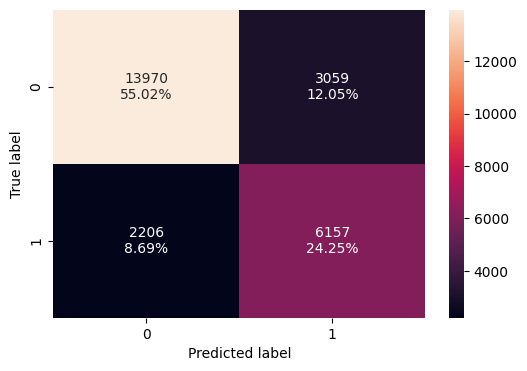

In [151]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [152]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


* Recall has increased significantly as compared to the previous model.
* By decreasing the threshold value, Recall will keep on increasing and the Precision will decrease, but this is not right, there is the need to choose an optimal balance between recall and precision.

#### Use Precision-Recall curve and see if we can find a better threshold

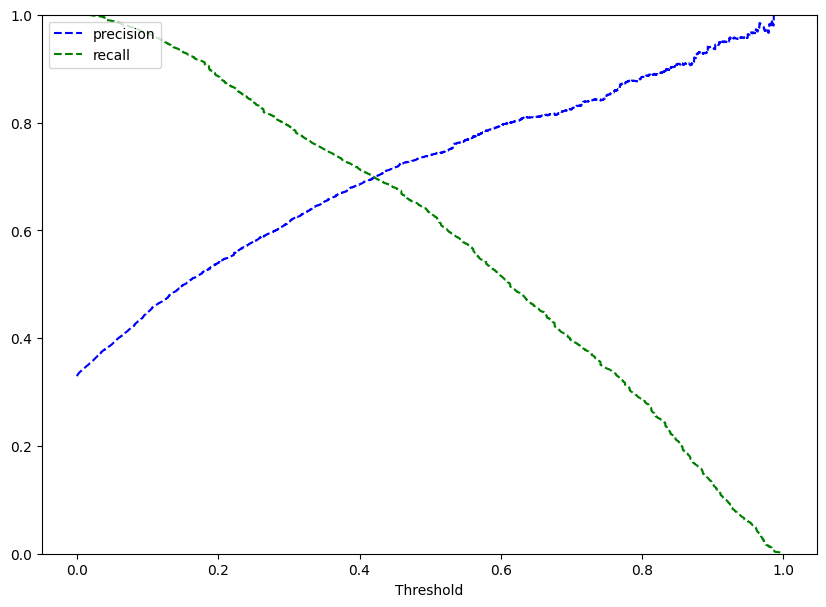

In [153]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* 0.42 threshold provides a balanced precision and recall.

In [155]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on  the training set



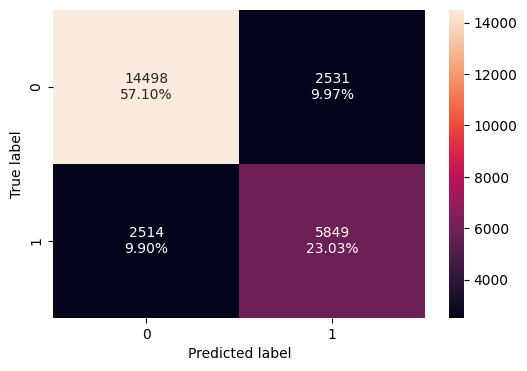

In [156]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [157]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


* Model performance has improved as compared to the initial model.
* Model has given a balanced performance in terms of precision and recall.

### Check the performance on the test set

**Using model with default threshold**

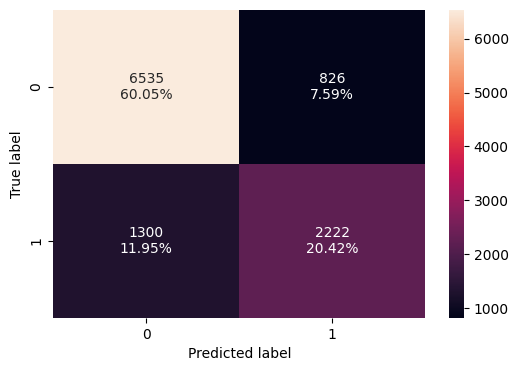

In [158]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [159]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


* ROC curve on test set

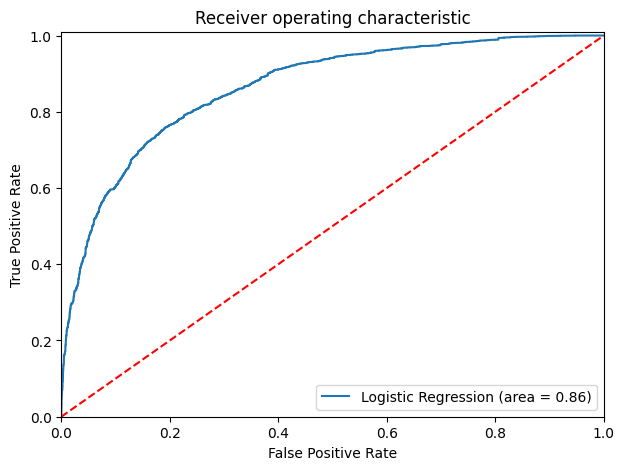

In [160]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

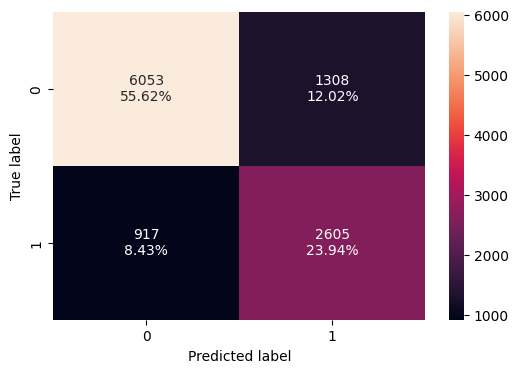

In [161]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [162]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


**Using model with threshold = 0.42**

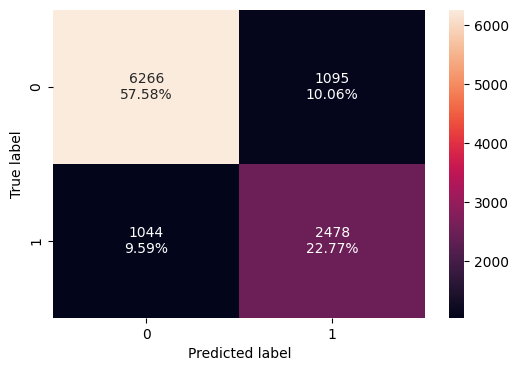

In [163]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [164]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


### Summary of Model Performance

In [165]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [166]:
# comparison of test performance 

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


### Observations from Logistic Regression model
- We have been able to build a predictive model that can be used by the hotel to predict which bookings are likely to be cancelled with an F1 score of 0.69 on the training set and formulate marketing policies accordingly.

* The logistic regression models are giving a generalised performance on training and test set.

* **Using the model with default threshold the model will give a low recall but good precision score -** The hotel will be able to predict which bookings will not be cancelled and will be able to provide satisfactory services to those customers which help in maintaining the brand equity but will lose on resources. 
* **Using the model with a 0.37 threshold the model will give a high recall but low precision score -** The hotel will be able to save resources by correctly predicting the bookings which are likely to be cancelled but might damage the brand equity.
* **Using the model with a 0.42 threshold the model will give a balance recall and precision score -** The hotel will be able to maintain a balance between resources and brand equity. 

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer cancelling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to an increase in the chances of a customer cancelling their booking.

## Decision Tree

In [167]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

#### First, create functions to calculate different metrics and confusion matrix to prevent the use of the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [168]:
# define a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [169]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Decision Tree Model

In [170]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Check model performance on training set

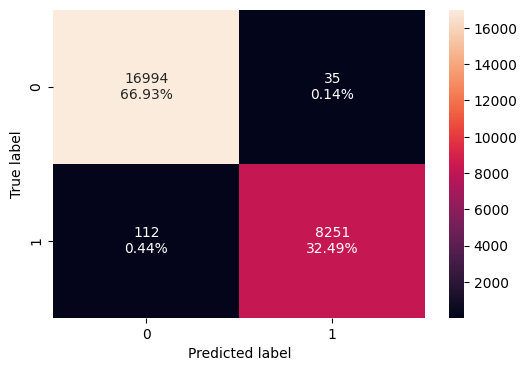

In [171]:
confusion_matrix_sklearn(model, X_train, y_train)

In [172]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* A decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Check the performance on test data to see if the model is overfitting.

Check model performance on test set

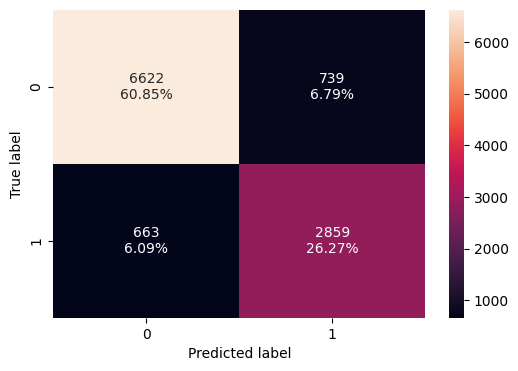

In [173]:
confusion_matrix_sklearn(model, X_test, y_test)

In [176]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


* The decision tree model is overfitting the data as expected and not able to generalise well on the test set.
* Next is to prune the decision tree.

**Before pruning the tree check the important features.**

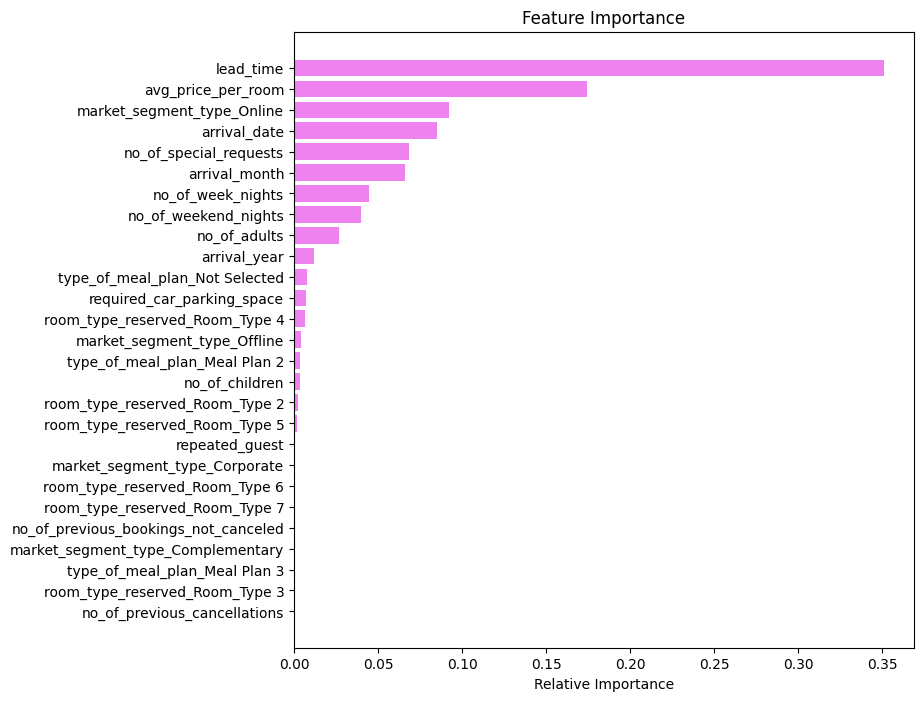

In [177]:
feature_names = list(X_train.columns)
importance = model.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(8, 8))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importance[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time is the most important feature followed by average price per room.
* Prune the tree to see if we can reduce the complexity.

### Pruning the tree

**Pre-Pruning**

In [178]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Check performance on training set

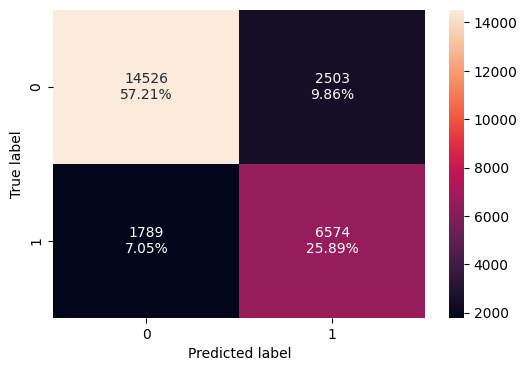

In [179]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [180]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


#### Check performance on test set

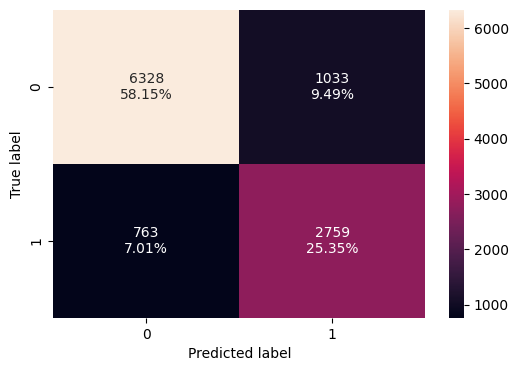

In [181]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [182]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444




### Visualise the Decision Tree

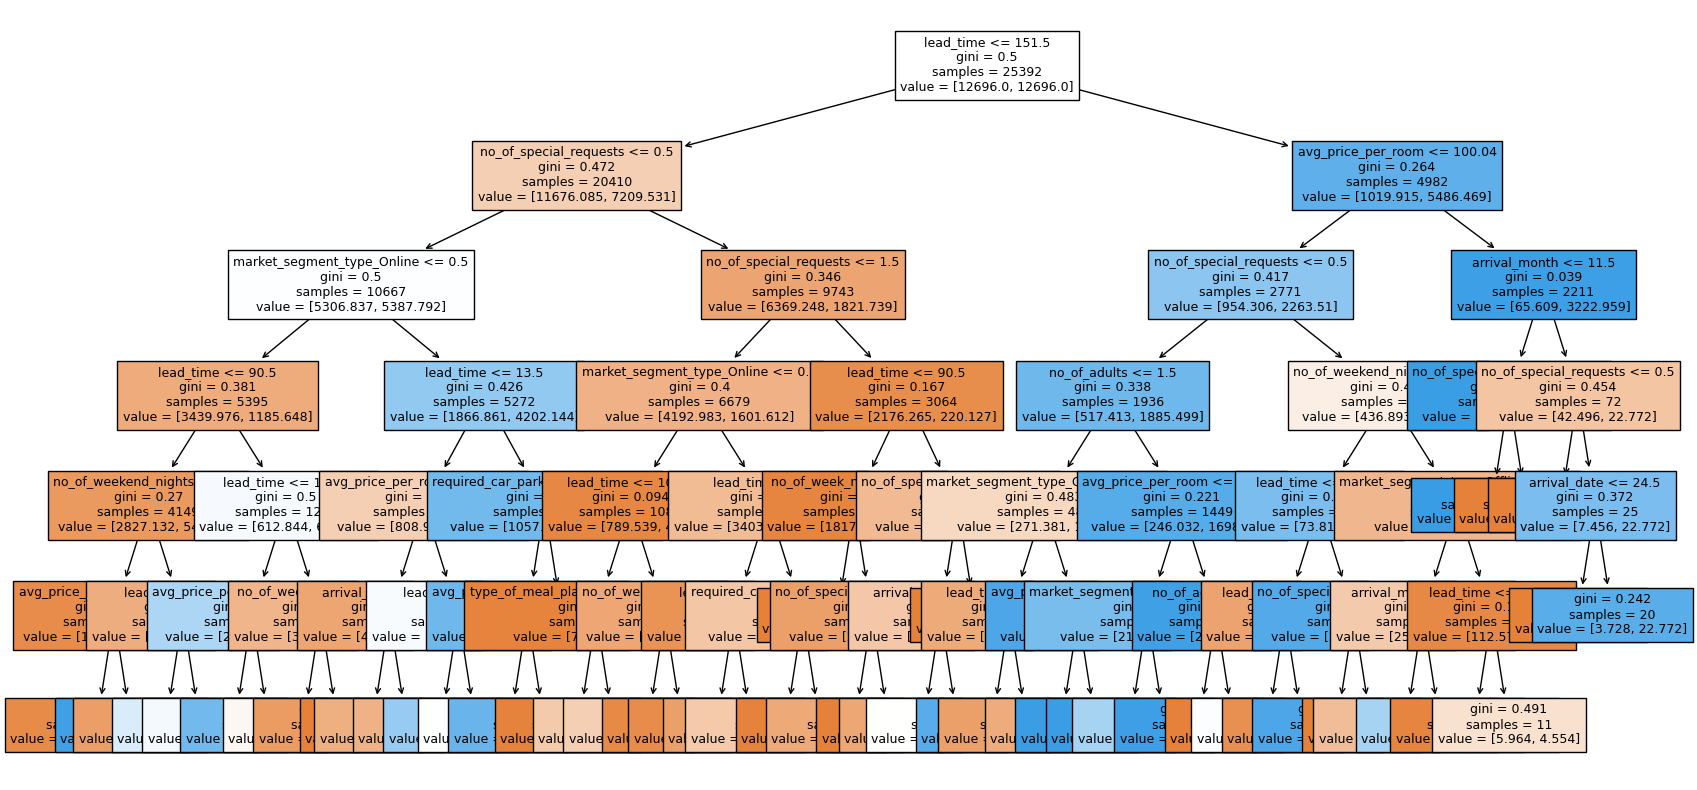

In [183]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [184]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

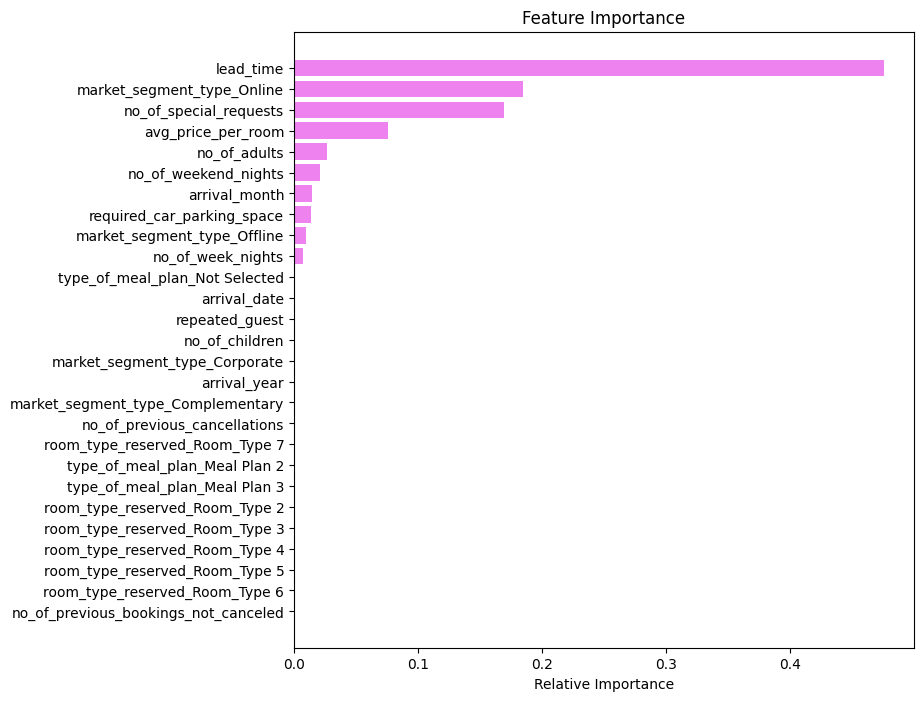

In [187]:
# important features to  build the tree

importance = estimator.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(8, 8))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importance[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations from decision tree

* It shows that the tree has become simpler and the rules of the trees are readable.
* The model performance of the model has been generalised.


* From the result it shows the most important features are:
    * Lead Time
    * Market Segment - Online
    * Number of special requests
    * Average price per room

**The rules obtained from the decision tree can be interpreted as:**

* The rules show that lead time plays a key role in identifying if a booking will be cancelled or not. 151 days has been considered as a threshold value by the model to make the first split.

**Bookings made more than 151 days before the date of arrival:**

* If the average price per room is greater than 100 euros and the arrival month is December, then the the booking is less likely to be cancelled.
* If the average price per room is less than or equal to 100 euros and the number of special request is 0, then the booking is likely to get cancelled.

**Bookings made under 151 days before the date of arrival:**

* If a customer has at least 1 special request the booking is less likely to be cancelled. 
* If the customer did not make any special requests and the booking was done Online it is more likely to get cancelled, if the booking was not done online, it is less likely to be cancelled.

`For more complex analysis more in depth evaluation of the tree can be conducted`

**Cost Complexity Pruning**

In [188]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


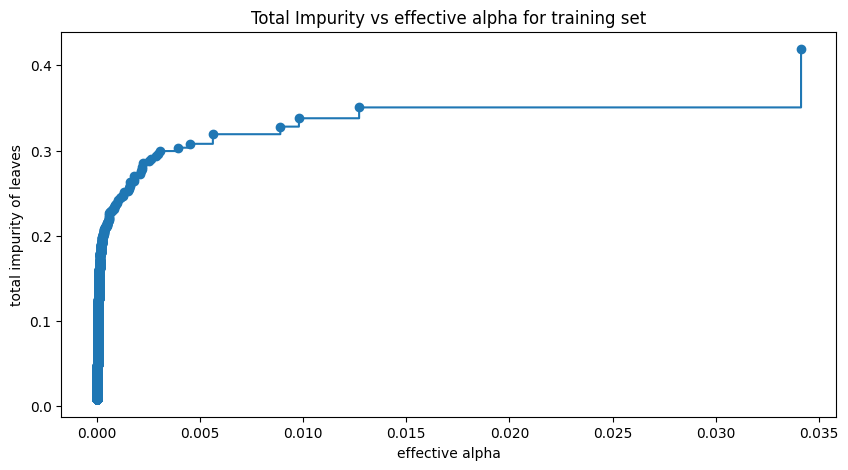

In [189]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, train the decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [190]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


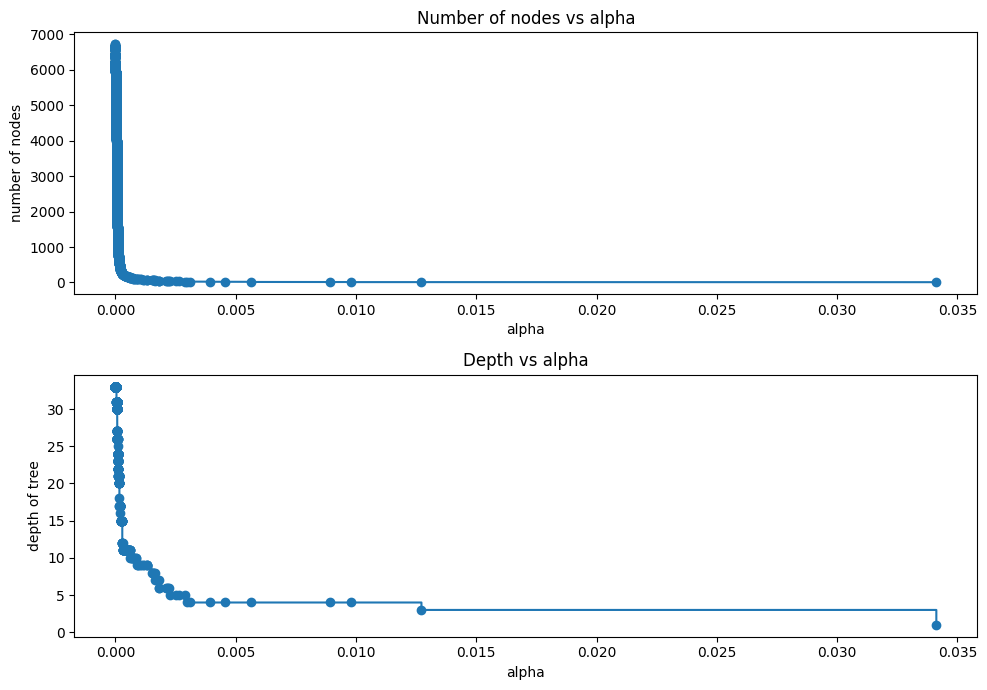

In [191]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for train and test sets

In [192]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

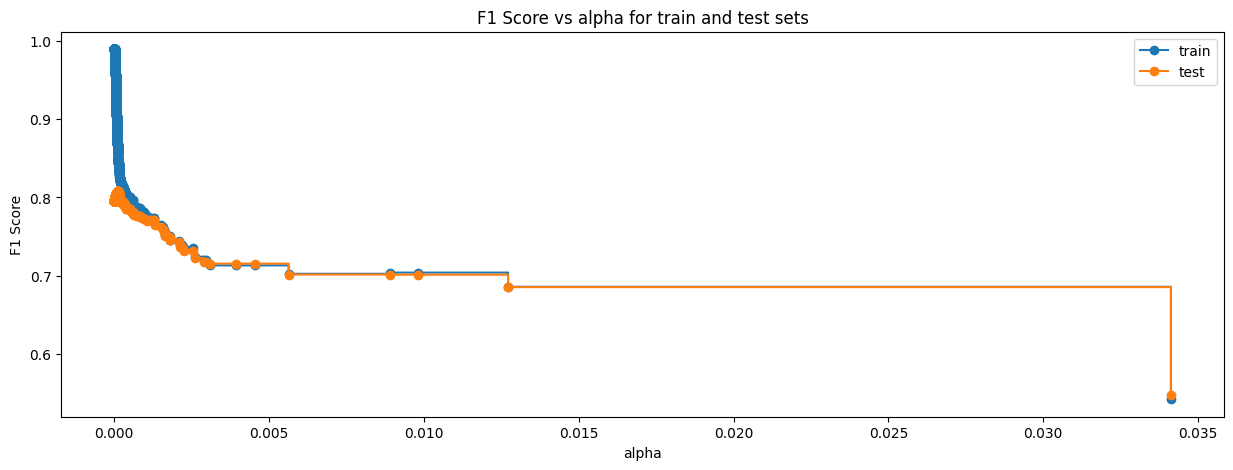

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for train and test sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [193]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


#### Check performance on train set

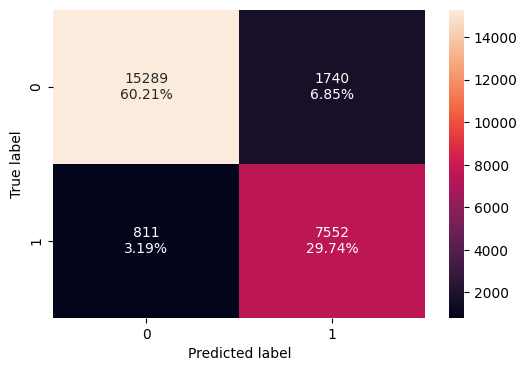

In [194]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [195]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


#### Check performance on the test set

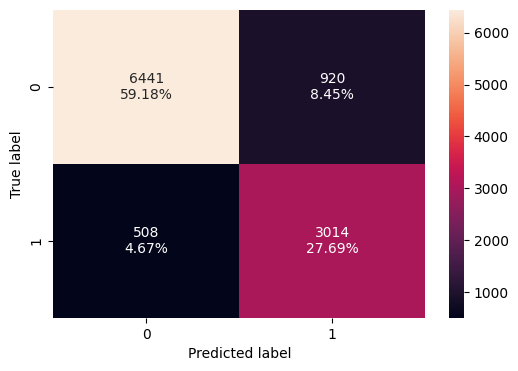

In [196]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [197]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


**Observation**
* After post pruning the decision tree the performance has generalised on the train and test set.
* A high recall is evident with this model but difference between recall and precision has increased.

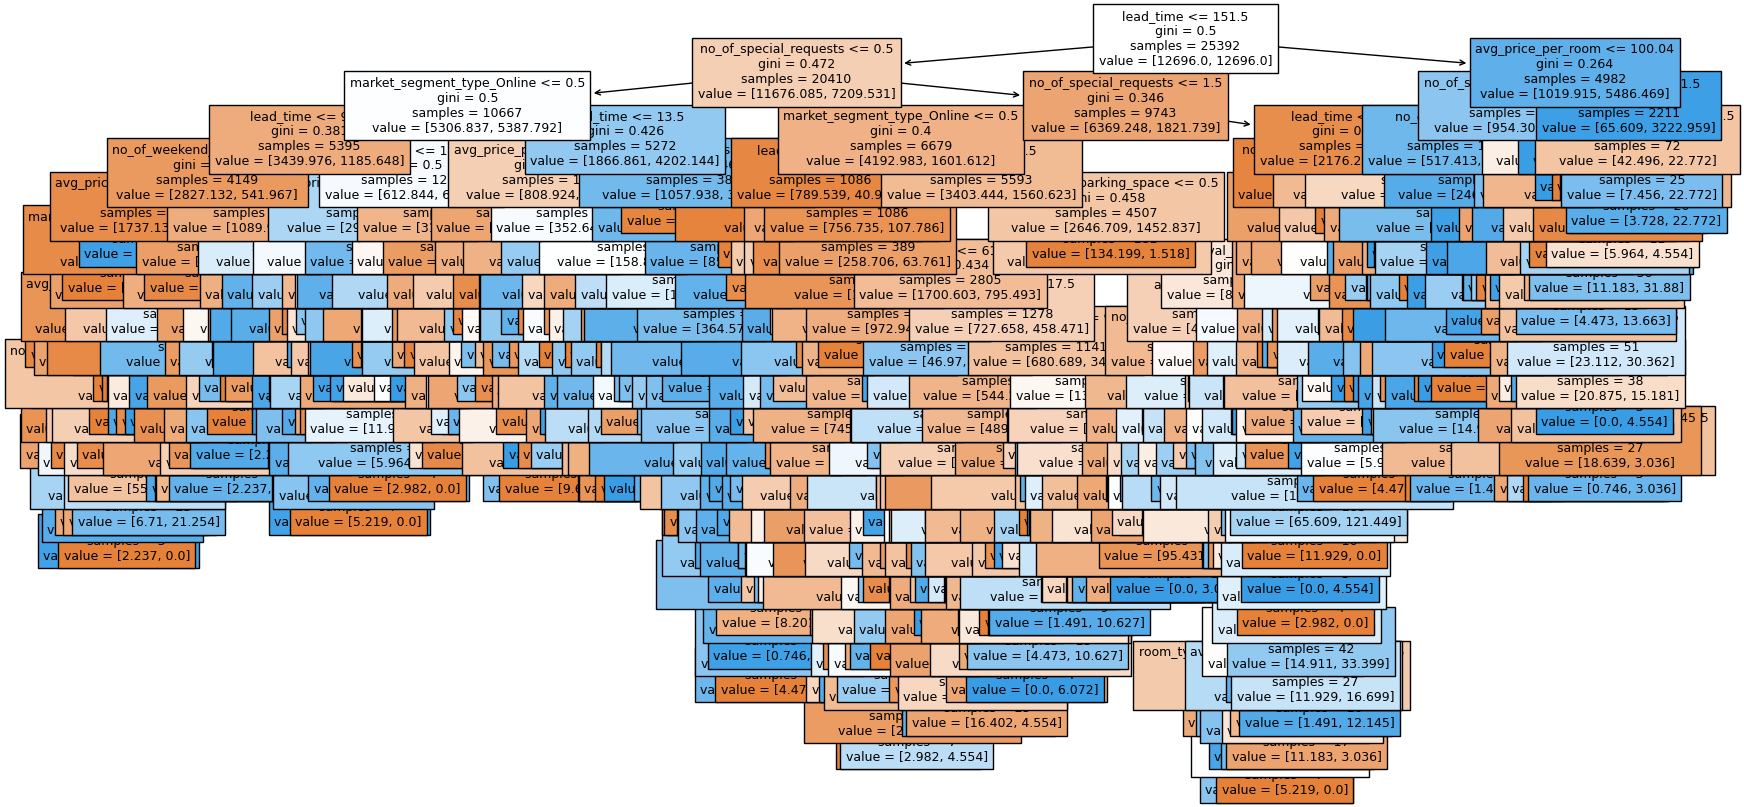

In [198]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [199]:
# Text report showing the rules of the decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

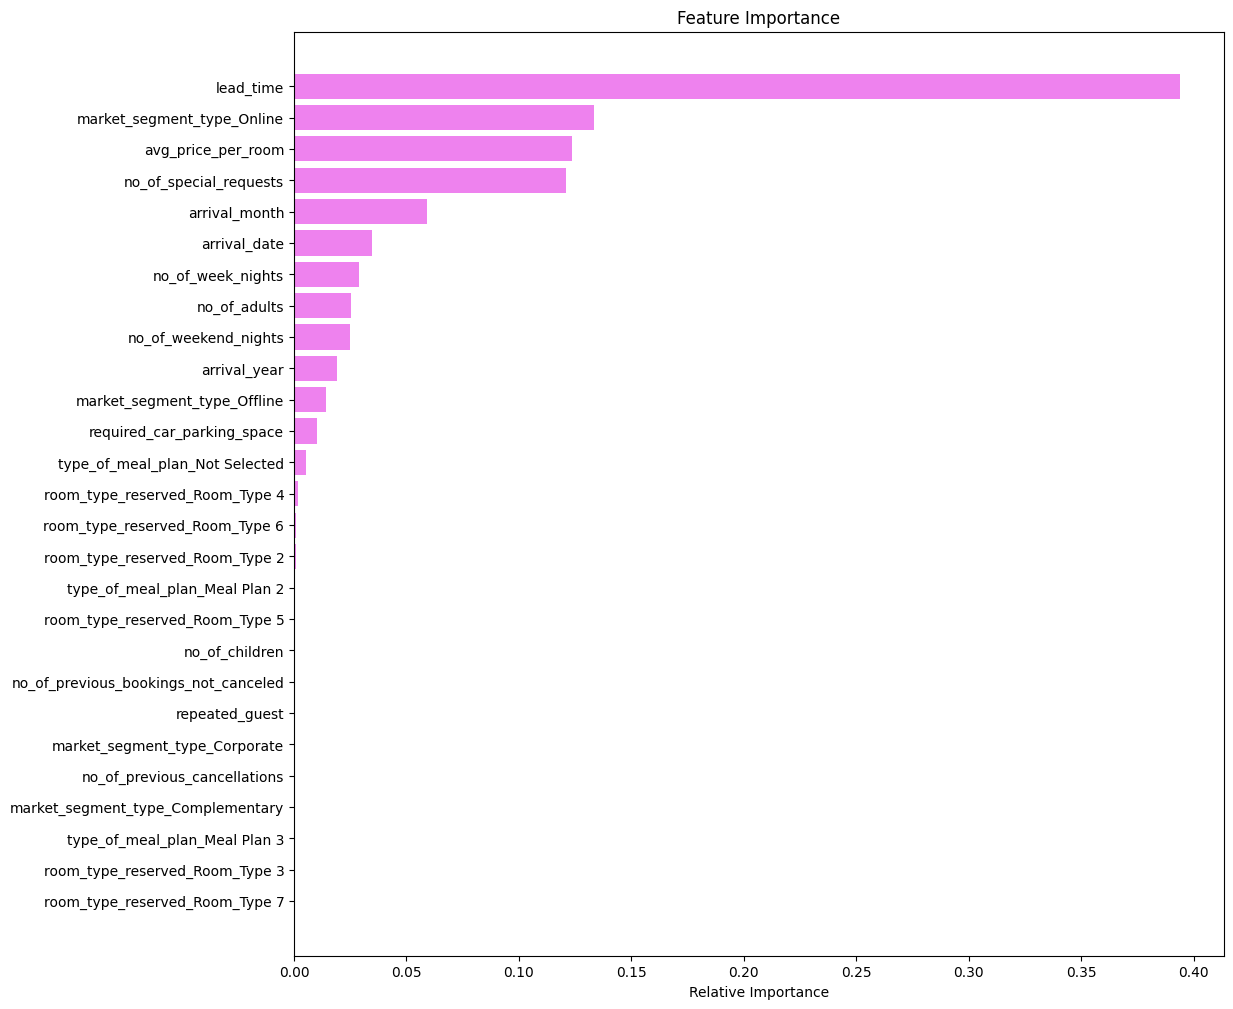

In [202]:
importance = best_model.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(12, 12))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importance[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation from tree**
* The tree is quite complex as complex as compared to the pre-pruned tree.
* The feature importance is same with pre-pruned tree.

### Comparing Decision Tree models

In [203]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89954
Recall,0.98661,0.78608,0.90303
Precision,0.99578,0.72425,0.81274
F1,0.99117,0.75390,0.85551


In [204]:
# test set performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.86879
Recall,0.81175,0.78336,0.85576
Precision,0.79461,0.72758,0.76614
F1,0.80309,0.75444,0.80848


**Analysis and Findings**
* Decision tree model with default parameters is overfitting the training data and is not able to *generalise* well.
* Pre-pruned tree has given a generalised performance with balanced values of precision and recall.
* Post-pruned tree is giving a high F1 score as compared to other models but the difference between precision and recall is high.
* The hotel will be able to maintain a balance between resources and brand equity using the pre-pruned decision tree model.

**Conclusion**
* Overall the Decision Tree model performed better on the dataset.
* Looking at important variables based on p-values in Logistic regression and feature importance in the Decision Tree model
    * Lead Time, Number of special requests, Average price per room are important in both models.
    * From the Logistic Regression model it is observed that Lead Time, and Average price per room have a positive relation with bookings getting canclled. Additionally the number of special requests has a negative relationship with bookings getting cancelled.

### Recommendations for the Business

1. The lead time and the number of special requests made by the customer plays an omportant in identifying if a booking will be cancelled or not. Bookings where a customer has made a special request and the booking was done under 151 days to the date of arrival are less likely to be cancelled.

    * The hotel can take the following actions with this knowledge:
        * Set up a system that can send a prompts like an automated email to the customers before the arrival date asking them to re-confirma their booking requirements with any changes they would like to make.
        * Remind guests about approaching deadlines.
 
Response from the customer will give the hotel enough time to re-sell the room or make preparations for customers' requests.

2. Stricter cancellation policies can be adopted by the hotel. 
    * Bookings with high average room costs and specific requests should not  be fully refunded because doing so would result in a significant loss of resources.

    * The cancellation procedures have to be consstent across all market segments, yet the data revealed, a significant portion of online reservations are cancelled. Online cancellations of reservations should result in a lower percentage of the customer's reimbursement.
    
The refunds, cancellation fee, etc should be highlighted on the website/app before a customer confirms their booking to safeguard their interest.

3. The length of stay at the hotel can be restricted.
    * The analysis revealed reservations with stays totaling more than 5 days had a higher likelihood of being cancelled.
    * If a customer wants to stay longer than 5 days, they should be asked to re-book with the hotel. For the corporate and aviation market segments, these policies may be relaxed. To avoid hampering their experience with the hotel, other market segments should find the process fairly simple.

The hotel may devise strategies to increase revenue in the event of such restrictions.

4. In the months of December and January cancellation to non-cancellation ratio is low. This could be as a result that customers might travel to celebrate Christmas and New Year.The hotel should make appropriate preparations to ensure they have a good balance of staff members on hand to meet the requirements of their guests.
 
5. October and September had the highest number of bookings, with a high number of cancellations. The hotel should investigate this issue thoroughly. 

6. Post-booking interactions can be initiated with the customers.

    * Post-booking interactions will show guests the level of attention and care they would receive at the hotel. 
       * Information about local and regional events and nteresting places to visit locally can be shared occasionally with guests to create a more personalised experience.

7. Improving the experience of repeat customers.

    * Analysis reveals that there are few repeat customers, and the number of cancellations among them is low. This is a positive sign because returning customers are crucial to the hospitality sector, because they can spread information of their experience through word of mouth.
    * A loyal guest  is typically more profitable for the business because they are familiar with the amenities offered by the hotel they have visited.
    * Compared to a repeat customer, attracting new customers is time-consuming and more expensive.
     * A loyalty program that provides these customers with exclusive discounts and access to hotel services can enhance their experience.